Importing all the relevant packages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading in the dataset

In [2]:
appl_data = pd.read_csv('application_data.csv')

In [3]:
appl_data.shape # 

(307511, 122)

#### Data Cleaning:
Let us analyze if the data is fit for analysis by checking the percentage of missing values

In [4]:
# Identifying the missing values in the dataset:

# Column-wise:
col_miss = (appl_data.isnull().sum(axis='rows')/appl_data.shape[0] * 100).sort_values(ascending=False)
col_miss

COMMONAREA_MEDI                69.872297
COMMONAREA_AVG                 69.872297
COMMONAREA_MODE                69.872297
NONLIVINGAPARTMENTS_MODE       69.432963
NONLIVINGAPARTMENTS_MEDI       69.432963
NONLIVINGAPARTMENTS_AVG        69.432963
FONDKAPREMONT_MODE             68.386172
LIVINGAPARTMENTS_MEDI          68.354953
LIVINGAPARTMENTS_MODE          68.354953
LIVINGAPARTMENTS_AVG           68.354953
FLOORSMIN_MEDI                 67.848630
FLOORSMIN_MODE                 67.848630
FLOORSMIN_AVG                  67.848630
YEARS_BUILD_MEDI               66.497784
YEARS_BUILD_AVG                66.497784
YEARS_BUILD_MODE               66.497784
OWN_CAR_AGE                    65.990810
LANDAREA_MODE                  59.376738
LANDAREA_AVG                   59.376738
LANDAREA_MEDI                  59.376738
BASEMENTAREA_MEDI              58.515956
BASEMENTAREA_AVG               58.515956
BASEMENTAREA_MODE              58.515956
EXT_SOURCE_1                   56.381073
NONLIVINGAREA_ME

We can see that the percentage of missing values is as high as 70% for some of the columns.<br>
Let us take a closer look at those columns where the missing values are in really high numbers

In [5]:
# Making a plot to understand more about the distribution:
col_miss = pd.DataFrame({'column' : col_miss.index, '%_missing' : col_miss.values})
col_miss.head()

,column,%_missing
0,COMMONAREA_MEDI,69.872297
1,COMMONAREA_AVG,69.872297
2,COMMONAREA_MODE,69.872297
3,NONLIVINGAPARTMENTS_MODE,69.432963
4,NONLIVINGAPARTMENTS_MEDI,69.432963


In [6]:
# Having a look at the distribution
col_miss['%_missing'].value_counts()

0.000000     55
13.501631     6
0.332021      4
50.193326     3
50.749729     3
67.848630     3
59.376738     3
69.432963     3
48.781019     3
53.295980     3
55.179164     3
58.515956     3
68.354953     3
50.348768     3
66.497784     3
69.872297     3
49.760822     3
0.214626      1
47.398304     1
50.840783     1
56.381073     1
31.345545     1
0.000650      1
0.090403      1
0.000325      1
0.420148      1
68.386172     1
0.003902      1
19.825307     1
48.268517     1
65.990810     1
50.176091     1
Name: %_missing, dtype: int64

In [7]:
# Now looking at the columns with approx 50% of the data missing:
col_miss[col_miss['%_missing'] >= 47]

,column,%_missing
0,COMMONAREA_MEDI,69.872297
1,COMMONAREA_AVG,69.872297
2,COMMONAREA_MODE,69.872297
3,NONLIVINGAPARTMENTS_MODE,69.432963
4,NONLIVINGAPARTMENTS_MEDI,69.432963
5,NONLIVINGAPARTMENTS_AVG,69.432963
6,FONDKAPREMONT_MODE,68.386172
7,LIVINGAPARTMENTS_MEDI,68.354953
8,LIVINGAPARTMENTS_MODE,68.354953
9,LIVINGAPARTMENTS_AVG,68.354953


One look at the above columns, and we can see that almost all of these are associated with the characteristics
of the place/building/house where the applicant lives. These columns could have provided some interesting insights had the data been present. Since that is not the case, let us drop these columns.

In [8]:
col_miss= col_miss[col_miss['%_missing'] < 47]
col_miss

,column,%_missing
49,OCCUPATION_TYPE,31.345545
50,EXT_SOURCE_3,19.825307
51,AMT_REQ_CREDIT_BUREAU_QRT,13.501631
52,AMT_REQ_CREDIT_BUREAU_YEAR,13.501631
53,AMT_REQ_CREDIT_BUREAU_WEEK,13.501631
54,AMT_REQ_CREDIT_BUREAU_MON,13.501631
55,AMT_REQ_CREDIT_BUREAU_DAY,13.501631
56,AMT_REQ_CREDIT_BUREAU_HOUR,13.501631
57,NAME_TYPE_SUITE,0.420148
58,OBS_30_CNT_SOCIAL_CIRCLE,0.332021


In [9]:
# Now we are only left with 73 columns which will make our analysis concise and to the point.
appl_data = appl_data[col_miss['column']]
appl_data.shape

(307511, 73)

#### OCCUPATION TYPE:
Let us understand a little more about the applicants, starting with the Occupation that they are in.<br>
After that, we'll find the percentage of applicants who have defaulted on at least one payment across each Occupation.

In [10]:
# Taking a look at the values in the Occupation_type column:
print(appl_data['OCCUPATION_TYPE'].value_counts())

# The  data is heavily imbalanced, as the number of applicants that applied for the loan decreases with more 
# sophisticated/white collar jobs.

# Ratio of imbalance would be:
(appl_data['OCCUPATION_TYPE'].value_counts()).max() /(appl_data['OCCUPATION_TYPE'].value_counts()).min() 

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64


104.91634980988593

An imabalance ratio of 105 tells us that the Labourer section is 105 times more likely to apply for a loan than IT staff.

In [11]:
# Number of people across categories that applied for the loan:
occ_typ_applied = appl_data['OCCUPATION_TYPE'].value_counts()
occ_typ_applied = pd.DataFrame({'occupation':occ_typ_applied.index, 'count_applied':occ_typ_applied.values})
occ_typ_applied

,occupation,count_applied
0,Laborers,55186
1,Sales staff,32102
2,Core staff,27570
3,Managers,21371
4,Drivers,18603
5,High skill tech staff,11380
6,Accountants,9813
7,Medicine staff,8537
8,Security staff,6721
9,Cooking staff,5946


In [12]:
# Finding the number of people who had problems in repaying the loan:
occ_typ_problem = appl_data[['TARGET', 'OCCUPATION_TYPE']]
occ_typ_problem = occ_typ_problem.groupby('OCCUPATION_TYPE').sum()
occ_typ_problem = occ_typ_problem.reset_index()
occ_typ_problem

,OCCUPATION_TYPE,TARGET
0,Accountants,474
1,Cleaning staff,447
2,Cooking staff,621
3,Core staff,1738
4,Drivers,2107
5,HR staff,36
6,High skill tech staff,701
7,IT staff,34
8,Laborers,5838
9,Low-skill Laborers,359


In [13]:
# Now merging the two dataframes to find the % of people with problems in repaying loan across each category:
occ_typ = occ_typ_applied.merge(occ_typ_problem, how='inner', left_on='occupation', right_on='OCCUPATION_TYPE')
occ_typ

,occupation,count_applied,OCCUPATION_TYPE,TARGET
0,Laborers,55186,Laborers,5838
1,Sales staff,32102,Sales staff,3092
2,Core staff,27570,Core staff,1738
3,Managers,21371,Managers,1328
4,Drivers,18603,Drivers,2107
5,High skill tech staff,11380,High skill tech staff,701
6,Accountants,9813,Accountants,474
7,Medicine staff,8537,Medicine staff,572
8,Security staff,6721,Security staff,722
9,Cooking staff,5946,Cooking staff,621


In [14]:
# Dropping unwanted columns:
occ_typ.drop('occupation', axis='columns', inplace = True)

In [15]:
# Renaming columns:
occ_typ = occ_typ.rename(columns = {'TARGET':'count_problem'})

In [16]:
# Finding the %:
occ_typ['percentage_with_problems'] = round((occ_typ['count_problem']/occ_typ['count_applied'])*100,2)
occ_typ

,count_applied,OCCUPATION_TYPE,count_problem,percentage_with_problems
0,55186,Laborers,5838,10.58
1,32102,Sales staff,3092,9.63
2,27570,Core staff,1738,6.30
3,21371,Managers,1328,6.21
4,18603,Drivers,2107,11.33
5,11380,High skill tech staff,701,6.16
6,9813,Accountants,474,4.83
7,8537,Medicine staff,572,6.70
8,6721,Security staff,722,10.74
9,5946,Cooking staff,621,10.44


In [17]:
# Sorting the dataframe:
occ_typ = occ_typ.sort_values('percentage_with_problems', ascending = False)
occ_typ = occ_typ.reset_index(drop=True)
occ_typ

,count_applied,OCCUPATION_TYPE,count_problem,percentage_with_problems
0,2093,Low-skill Laborers,359,17.15
1,18603,Drivers,2107,11.33
2,1348,Waiters/barmen staff,152,11.28
3,6721,Security staff,722,10.74
4,55186,Laborers,5838,10.58
5,5946,Cooking staff,621,10.44
6,32102,Sales staff,3092,9.63
7,4653,Cleaning staff,447,9.61
8,751,Realty agents,59,7.86
9,1305,Secretaries,92,7.05


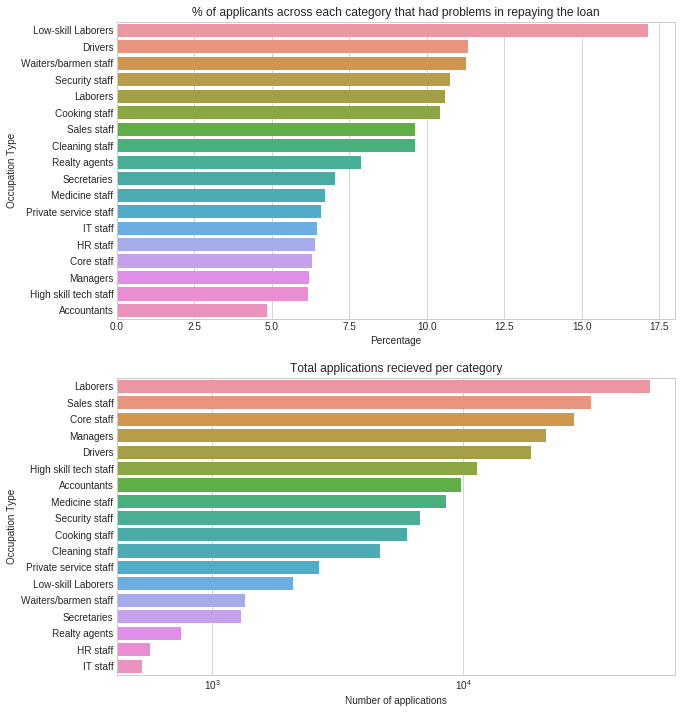

In [18]:
# Plotting a barplot:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,12))
plt.subplot(211)
sns.barplot('percentage_with_problems', 'OCCUPATION_TYPE', data=occ_typ)
plt.title('% of applicants across each category that had problems in repaying the loan')
plt.xlabel('Percentage')
plt.ylabel('Occupation Type')

plt.subplot(212)
occ_typ_applied = occ_typ_applied.sort_values('count_applied', ascending = False)
occ_typ_applied = occ_typ_applied.reset_index(drop = True)
sns.barplot('count_applied', 'occupation', data=occ_typ_applied)
plt.title('Total applications recieved per category')
plt.xlabel('Number of applications')
plt.ylabel('Occupation Type')
plt.xscale('log')

From the above plot, we can see that Blue-collar workers are more likely to default on their loan payments with the precentage for ‘Low-skill Labourers’ as high as 17%.<br>
The White-collar applicants are less likely to default on their loans.<br>
The top 5 most risky occupations w.r.t rate of default amongst the applicants stand as follows:<br>
1.  Low-skill Labourers (17.15%) <br>
2. Drivers (11.33%)<br>
3. Waiters/barmen staff (11.28%) <br>
4. Security staff (10.74%)<br>
5. Laborers (10.58%)<br>

The top 5 least risky occupations w.r.t rate of default amongst the applicants stand as follows:<br>
1. Accountants (4.83%)<br>
2. High skill tech staff (6.16%)<br>
3. Managers (6.21%)<br>
4. Core staff (6.30%)<br>
5. HR staff (6.40%)<br>

#### NAME_TYPE_SUITE:
Let us take a look at who accompanied the client at the time of loan application and whether it has any effect on the client defaulting the loan payments.

In [19]:
# Different categories:
appl_data['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [20]:
# Total number of applications:
clnt_accomp_applied = appl_data['NAME_TYPE_SUITE'].value_counts()
clnt_accomp_applied = pd.DataFrame({'Accompanied_by':clnt_accomp_applied.index,
                                    'Count' : clnt_accomp_applied.values})

# Total number of applicants with problems in repaying the loan:
clnt_accomp_problems = appl_data[['TARGET', 'NAME_TYPE_SUITE']]
clnt_accomp_problems = clnt_accomp_problems.groupby('NAME_TYPE_SUITE').sum()
clnt_accomp_problems = clnt_accomp_problems.reset_index()

# Merging the dataframes:
clnt_accomp = clnt_accomp_applied.merge(clnt_accomp_problems, how='inner',
                                       left_on='Accompanied_by', right_on='NAME_TYPE_SUITE')
clnt_accomp

,Accompanied_by,Count,NAME_TYPE_SUITE,TARGET
0,Unaccompanied,248526,Unaccompanied,20337
1,Family,40149,Family,3009
2,"Spouse, partner",11370,"Spouse, partner",895
3,Children,3267,Children,241
4,Other_B,1770,Other_B,174
5,Other_A,866,Other_A,76
6,Group of people,271,Group of people,23


In [21]:
# Finding the percentage:
clnt_accomp['percentage_with_problems'] = round((clnt_accomp['TARGET']/clnt_accomp['Count'])*100, 2)
clnt_accomp = clnt_accomp.sort_values('percentage_with_problems', ascending = False)

In [22]:
clnt_accomp

,Accompanied_by,Count,NAME_TYPE_SUITE,TARGET,percentage_with_problems
4,Other_B,1770,Other_B,174,9.83
5,Other_A,866,Other_A,76,8.78
6,Group of people,271,Group of people,23,8.49
0,Unaccompanied,248526,Unaccompanied,20337,8.18
2,"Spouse, partner",11370,"Spouse, partner",895,7.87
1,Family,40149,Family,3009,7.49
3,Children,3267,Children,241,7.38


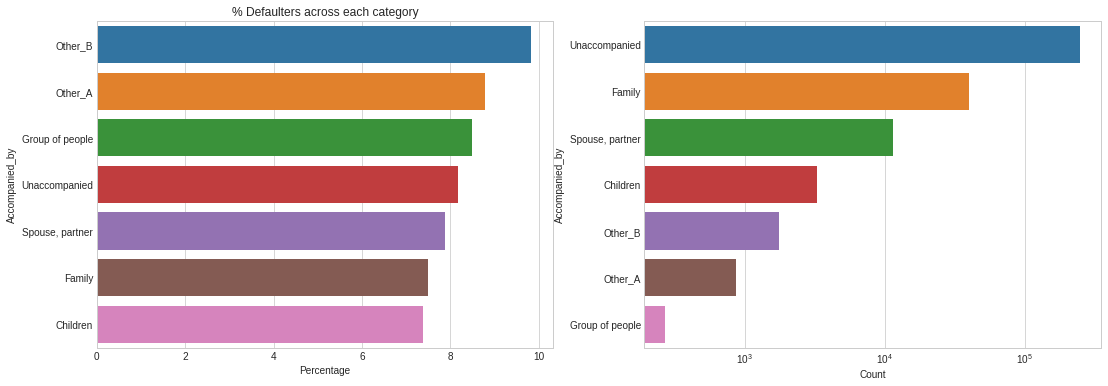

In [23]:
# Plotting the graph:
plt.figure(figsize = (18,6))
plt.subplot(121)
sns.barplot('percentage_with_problems', 'Accompanied_by', data= clnt_accomp)
plt.title('% Defaulters across each category')
plt.xlabel('Percentage')

plt.subplot(122)
sns.barplot('Count', 'Accompanied_by', data=clnt_accomp_applied)
plt.xscale('log')

From the above plot, it becomes clear that the client is more likely to default on the loan payments if he/she is accompanied by anyone else than his/her family.<br>
Furthermore in family, the applicant who comes along with his/her children is the least likely to default on the payments with the default rate being around 7.5%.<br>
<br>
Extra care should be taken when the applicant arrives with someone who is unrelated to him as the default rates are much higher for them nearing around 10%

#### AMT_ANNUITY:
The total payment that the client has to make each year until the loan is repaid in full. Let us see if there is any particular segment for which the client is more likely to default

In [24]:
appl_data['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [25]:
annuity = appl_data[['TARGET', 'AMT_ANNUITY']]

# Rounding off the annuity amount to the nearest 10th value:
annuity['AMT_ANNUITY'] = round(annuity['AMT_ANNUITY'], 0)

# Removing the missing values:
annuity = annuity[~annuity['AMT_ANNUITY'].isnull()]

# Converting the datatype to INT:
annuity['AMT_ANNUITY'] =annuity['AMT_ANNUITY'].astype(int)

annuity.head()

/home/savan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,TARGET,AMT_ANNUITY
0,1,24700
1,0,35698
2,0,6750
3,0,29686
4,0,21866


In [26]:
# Categorising it into buckets for further analysis, but first let us look at the distribution
annuity_list = []
for i in annuity['AMT_ANNUITY']:
    if i>=0 and i<25000:
        annuity_list.append('0-25k')
    elif i>=25000 and i<50000:
        annuity_list.append('25-50k')
    elif i>=50000 and i<75000:
        annuity_list.append('50-75k')
    elif i>=75000 and i<100000:
        annuity_list.append('75-100k')
    elif i>=100000 and i<125000:
        annuity_list.append('100-125k')
    elif i>=125000 and i<150000:
        annuity_list.append('125-150k')
    elif i>=150000 and i<175000:
        annuity_list.append('150-175k')
    elif i>=175000 and i<200000:
        annuity_list.append('175-200k')
    elif i>=200000 and i<225000:
        annuity_list.append('200-225k')
    elif i>=225000 and i<250000:
        annuity_list.append('225-250k')
    elif i>=250000 and i<275000:
        annuity_list.append('250-275k')

annuity['ANNUITY_GROUP'] = annuity_list

In [27]:
# Looking at the frequency of each group:
annuity['ANNUITY_GROUP'].value_counts()

0-25k       154867
25-50k      131330
50-75k       19326
75-100k       1471
100-125k       342
125-150k        95
150-175k        24
225-250k        24
200-225k        11
175-200k         8
250-275k         1
Name: ANNUITY_GROUP, dtype: int64

We can see that the majority of the applicants fall under the groups 0 to 100k group.<br>
Let us find the percentage defualt for each of these categories

In [28]:
# Total applicants:
annuity_tot = annuity['ANNUITY_GROUP'].value_counts()
annuity_tot = pd.DataFrame({'Annuity Group':annuity_tot.index, 'Count_total':annuity_tot.values})

# Number of defaulters:
annuity_dflt = annuity['TARGET'].groupby(annuity['ANNUITY_GROUP']).sum()
annuity_dflt = pd.DataFrame({'Annuity Group':annuity_dflt.index, 'Count_default':annuity_dflt.values})

# Merging:
annuity_tot = annuity_tot.merge(annuity_dflt, how='inner', on='Annuity Group')
# Percentage:
annuity_tot['percentage_defaulters'] = round((annuity_tot['Count_default']/annuity_tot['Count_total'])*100, 2)
annuity_tot

,Annuity Group,Count_total,Count_default,percentage_defaulters
0,0-25k,154867,12237,7.90
1,25-50k,131330,11364,8.65
2,50-75k,19326,1156,5.98
3,75-100k,1471,58,3.94
4,100-125k,342,7,2.05
5,125-150k,95,3,3.16
6,150-175k,24,0,0.00
7,225-250k,24,0,0.00
8,200-225k,11,0,0.00
9,175-200k,8,0,0.00


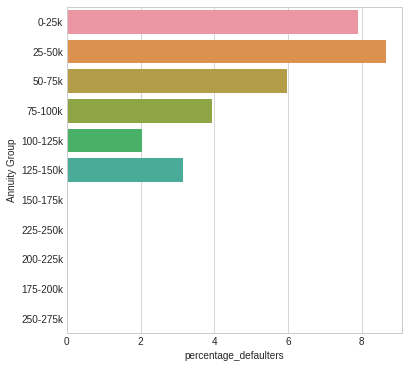

In [29]:
plt.figure(figsize=(6,6))
sns.barplot(y='Annuity Group', x='percentage_defaulters', data=annuity_tot)

We can see that the highest number of defaulters lie in the 25-50k annuity range, followed by 0-25k and 50-75k.<br>
It is curious to see that no applicant with an annuity greater than 150k has defaulted.

#### CLNT_FAM_MEMBERS 
Let us see if the number of family members in the applicants family have a bearing on the possibility of him/her defaulting on the loan payments

In [30]:
appl_data['CNT_FAM_MEMBERS'].value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [31]:
fam_members = appl_data[['CNT_FAM_MEMBERS', 'TARGET']].groupby('CNT_FAM_MEMBERS').sum()
fam_members = fam_members.reset_index()
fam_members = fam_members.sort_values('TARGET', ascending = False)
fam_members = fam_members.reset_index(drop=True)
fam_members

,CNT_FAM_MEMBERS,TARGET
0,2.0,12009
1,1.0,5675
2,3.0,4608
3,4.0,2136
4,5.0,327
5,6.0,55
6,7.0,6
7,8.0,6
8,10.0,1
9,11.0,1


In [32]:
fam_members_total = appl_data['CNT_FAM_MEMBERS'].value_counts()
fam_members_total = pd.DataFrame({'Members':fam_members_total.index, 'Number_of_applicants':fam_members_total.values})
fam_members_total

,Members,Number_of_applicants
0,2.0,158357
1,1.0,67847
2,3.0,52601
3,4.0,24697
4,5.0,3478
5,6.0,408
6,7.0,81
7,8.0,20
8,9.0,6
9,10.0,3


In [33]:
# Merging the two dataframes:
fam_members = fam_members.merge(fam_members_total, how='inner', left_on='CNT_FAM_MEMBERS',
                                right_on='Members')
fam_members

,CNT_FAM_MEMBERS,TARGET,Members,Number_of_applicants
0,2.0,12009,2.0,158357
1,1.0,5675,1.0,67847
2,3.0,4608,3.0,52601
3,4.0,2136,4.0,24697
4,5.0,327,5.0,3478
5,6.0,55,6.0,408
6,7.0,6,7.0,81
7,8.0,6,8.0,20
8,10.0,1,10.0,3
9,11.0,1,11.0,1


In [34]:
fam_members['percentage'] = round((fam_members['TARGET']/fam_members['Number_of_applicants'] * 100), 2)
fam_members

,CNT_FAM_MEMBERS,TARGET,Members,Number_of_applicants,percentage
0,2.0,12009,2.0,158357,7.58
1,1.0,5675,1.0,67847,8.36
2,3.0,4608,3.0,52601,8.76
3,4.0,2136,4.0,24697,8.65
4,5.0,327,5.0,3478,9.40
5,6.0,55,6.0,408,13.48
6,7.0,6,7.0,81,7.41
7,8.0,6,8.0,20,30.00
8,10.0,1,10.0,3,33.33
9,11.0,1,11.0,1,100.00


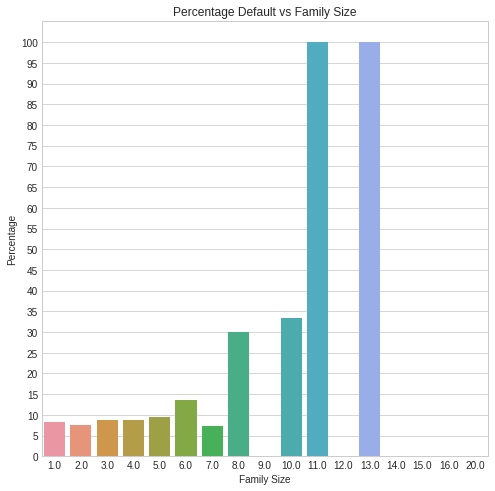

In [35]:
plt.figure(figsize=(8,8))
sns.barplot('CNT_FAM_MEMBERS','percentage', data=fam_members)
plt.yticks([i for i in range(0,101,5)])
plt.title('Percentage Default vs Family Size')
plt.xlabel('Family Size')
plt.ylabel('Percentage')
plt.show()

From the above plot, we can see that the percentage of people who are likely to default increases with the increase in the family size.<br>
However, it is to be noted that the applicants with more than 10 family members are very less, in fact they are in  single digits and therefore nothing can be said about them.

#### AMT_CREDIT:
Final amount that was credited to the applicant after the loan was approved.

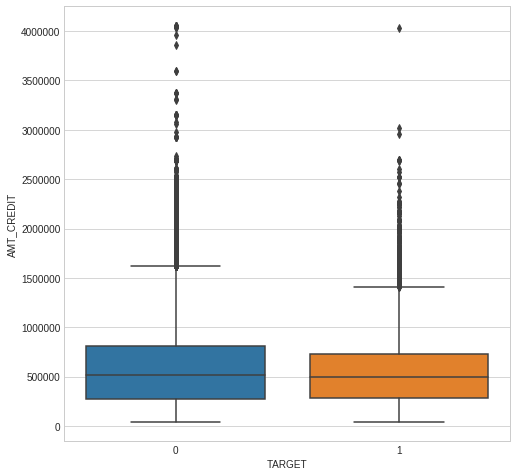

In [36]:
amt_credit = appl_data[['AMT_CREDIT', 'TARGET']]

plt.figure(figsize=(8,8))
sns.boxplot(y='AMT_CREDIT', x='TARGET', data=amt_credit)

From the above plot, we can see that the quantile values are very similar.<br>

However, checking if the potential defaulters have disclosed their Occupation_type or not:

In [37]:
# Finding the occupation of applicants in this outlier region:
amt_credit_1 = appl_data[(appl_data['TARGET'] == 1) & (appl_data['AMT_CREDIT']>= 1500000)][['TARGET',
                                                                                            'AMT_CREDIT',
                                                                                           'OCCUPATION_TYPE']]
amt_credit_1.shape

(476, 3)

In [38]:
amt_credit_1.sort_values('AMT_CREDIT', ascending = False)

,TARGET,AMT_CREDIT,OCCUPATION_TYPE
186230,1,4027680.0,NaN
87956,1,3020760.0,Laborers
8940,1,2961000.0,Laborers
93163,1,2695500.0,Managers
193640,1,2695500.0,IT staff
268268,1,2695500.0,Laborers
284161,1,2695500.0,Cooking staff
75664,1,2687355.0,Sales staff
182818,1,2606400.0,Private service staff
135826,1,2575125.0,High skill tech staff


I can see that there are multiple NaN values in the Occupation column.<br>
There might be a case where the applicants who do not reveal their jobs are potential defaulters<br>
Analysing this case:

In [39]:
amt_credit_1.sort_values('AMT_CREDIT', ascending=False)['OCCUPATION_TYPE'].value_counts(dropna=False)

NaN                      126
Laborers                  80
Managers                  72
Core staff                46
Sales staff               42
Drivers                   34
High skill tech staff     21
Accountants               13
Medicine staff            11
Security staff             7
Private service staff      6
HR staff                   4
Cooking staff              4
Secretaries                4
IT staff                   2
Waiters/barmen staff       1
Cleaning staff             1
Realty agents              1
Low-skill Laborers         1
Name: OCCUPATION_TYPE, dtype: int64

There are 126 applicants in total that have not disclosed their occupation

Text(0.5,1,'Distribution of potential defaulters who have not disclosed their Occupation')

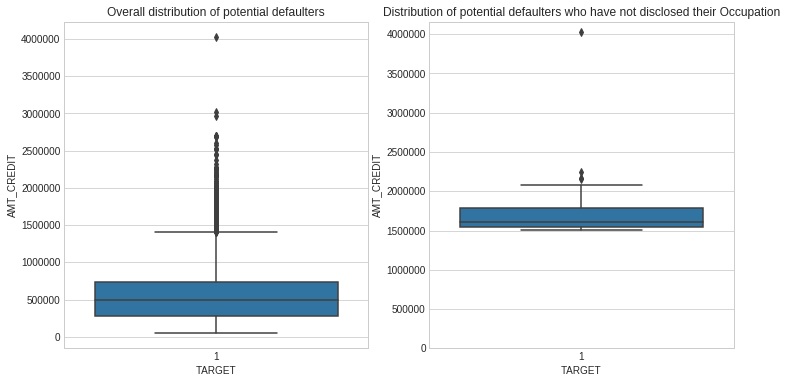

In [40]:
amt_credit_1_nan = amt_credit_1[amt_credit_1['OCCUPATION_TYPE'].isnull()]

# checking the distribution:
plt.figure(figsize=(12,6))
plt.subplot(121)
amt_credit_only1 = amt_credit[amt_credit['TARGET']==1]
sns.boxplot(y='AMT_CREDIT', x='TARGET', data=amt_credit_only1)
plt.title('Overall distribution of potential defaulters')
plt.yticks([i for i in range(0, 4000001, 500000)])

plt.subplot(122)
sns.boxplot(y='AMT_CREDIT', x='TARGET', data=amt_credit_1_nan)
plt.yticks([i for i in range(0, 4000001, 500000)])
plt.title('Distribution of potential defaulters who have not disclosed their Occupation')

It can be seen that the potential defaulters who haven't disclosed their Occupation type have taken comparatively higher loans than overall potential defaulter applicants who have in fact disclosed their occupation.

Analysing the correlation between the amount of loan taken (amt_credit) and the total number of people in the family.

In [41]:
# How does AMT_CREDIT change with the number of members in the family?
fam_amt_occ = appl_data[['CNT_FAM_MEMBERS', 'TARGET', 'AMT_CREDIT', 'OCCUPATION_TYPE']]
fam_amt_occ.head()

,CNT_FAM_MEMBERS,TARGET,AMT_CREDIT,OCCUPATION_TYPE
0,1.0,1,406597.5,Laborers
1,2.0,0,1293502.5,Core staff
2,1.0,0,135000.0,Laborers
3,2.0,0,312682.5,Laborers
4,1.0,0,513000.0,Core staff


In [42]:
# Average amount credited to the applicants account based on the number of family members:
fam_amt = fam_amt_occ['AMT_CREDIT'].groupby(fam_amt_occ['CNT_FAM_MEMBERS']).mean()
fam_amt = pd.DataFrame({'Members':fam_amt.index, 'Average AMT_CREDIT':fam_amt.values})
fam_amt

,Members,Average AMT_CREDIT
0,1.0,5.119075e+05
1,2.0,6.312042e+05
2,3.0,6.078110e+05
3,4.0,6.111331e+05
4,5.0,6.131663e+05
5,6.0,6.241107e+05
6,7.0,5.791943e+05
7,8.0,4.883855e+05
8,9.0,5.102835e+05
9,10.0,5.450400e+05


Text(0,0.5,'Amount Credited')

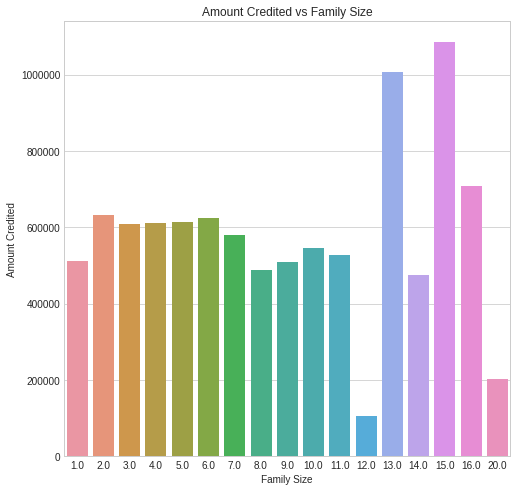

In [43]:
# Plotting a barplot:
plt.figure(figsize=(8,8))
sns.barplot('Members', 'Average AMT_CREDIT', data=fam_amt)
plt.title('Amount Credited vs Family Size')
plt.xlabel('Family Size')
plt.ylabel('Amount Credited')

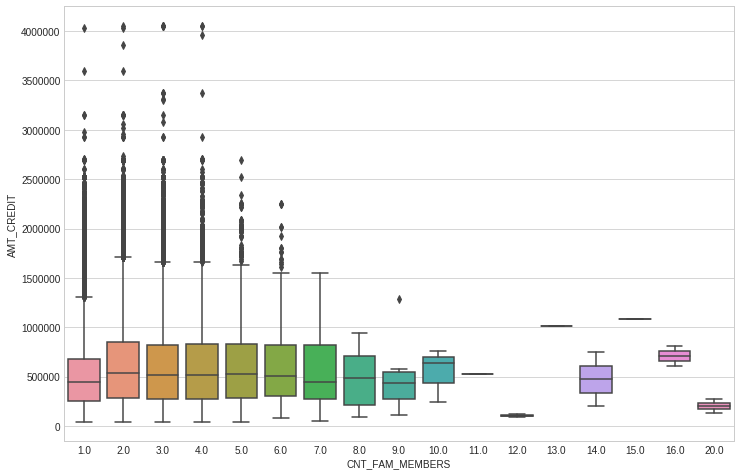

In [44]:
# Plotting a boxplot for the same:
plt.figure(figsize = (12,8))
sns.boxplot(x='CNT_FAM_MEMBERS', y='AMT_CREDIT', data=fam_amt_occ)

#fam_amt_occ['CNT_FAM_MEMBERS'].value_counts()

WE can see that the average amount credited, does not fluctuate that much from 2 to 7 family members, however it takes a dip at 8 and 9 family members respectively.<br>
The spikes at 13, 15 and 16 family members can be ignored since there are very less applicants which fall in this category (single digit applicants).

In [45]:
# FLAG_EMAIL:
appl_data['FLAG_EMAIL'].value_counts(normalize=True)

# WE can see that only 5% of the applicants have provided email id's to the bank.

0    0.94328
1    0.05672
Name: FLAG_EMAIL, dtype: float64

In [46]:
# Number of total applicants in each category:
email_total = appl_data['FLAG_EMAIL'].value_counts()
email_total = pd.DataFrame({'Disclosed email':email_total.index, 'Count_total':email_total.values})

# Number of applicants who had difficulties repaying the loan:
email_1 = appl_data['FLAG_EMAIL'].groupby(appl_data['TARGET']).sum()
email_1 = pd.DataFrame({'Disclosed email':email_1.index, 'Count_0':email_1.values})

# Merging the df's:
email = email_total.merge(email_1, how='inner', on='Disclosed email')

# Adding a new column for percentage
email['percentage'] = round((email['Count_0']/email['Count_total'])*100, 2)
email

,Disclosed email,Count_total,Count_0,percentage
0,0,290069,16068,5.54
1,1,17442,1374,7.88


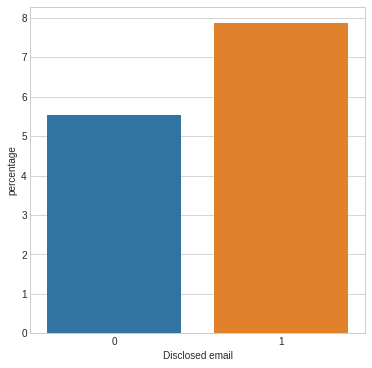

In [47]:
# Plotting:
plt.figure(figsize=(6,6))
sns.barplot(x='Disclosed email', y='percentage', data=email)

We can see that the clients who disclosed their email address are 8% likely to default on their loans whereas the applicants who did not disclose their email addresses were about 5.5% likely to default.

In [48]:
# total number of applicants:
phone = appl_data['FLAG_PHONE'].value_counts()
phone = pd.DataFrame({'Phone no. provided':phone.index, 'Count_total':phone.values})

# applicants with problems:
phone_1 = appl_data['TARGET'].groupby(appl_data['FLAG_PHONE']).sum()
phone_1 = pd.DataFrame({'Phone no. provided':phone_1.index, 'Count_default':phone_1.values})

# Merging:
phone = phone.merge(phone_1, how='inner', on='Phone no. provided')

# Percentage:
phone['percentage'] = round((phone['Count_default']/phone['Count_total'])*100, 2)
phone

,Phone no. provided,Count_total,Count_default,percentage
0,0,221080,18744,8.48
1,1,86431,6081,7.04


In [49]:
def contact_flag(col):
    # total number of applicants:
    phone = appl_data[col].value_counts()
    phone = pd.DataFrame({'Phone no. provided':phone.index, 'Count_total':phone.values})

    # applicants with problems:
    phone_1 = appl_data['TARGET'].groupby(appl_data[col]).sum()
    phone_1 = pd.DataFrame({'Phone no. provided':phone_1.index, 'Count_default':phone_1.values})

    # Merging:
    phone = phone.merge(phone_1, how='inner', on='Phone no. provided')

    # Percentage:
    phone['percentage'] = round((phone['Count_default']/phone['Count_total'])*100, 2)
    return(phone)

In [50]:
for i in ['FLAG_PHONE','FLAG_CONT_MOBILE','FLAG_WORK_PHONE','FLAG_EMP_PHONE','FLAG_MOBIL']:
    print('Analysis of ' + str(i))
    print(contact_flag(i))
    print('\n')

Analysis of FLAG_PHONE
   Phone no. provided  Count_total  Count_default  percentage
0                   0       221080          18744        8.48
1                   1        86431           6081        7.04


Analysis of FLAG_CONT_MOBILE
   Phone no. provided  Count_total  Count_default  percentage
0                   1       306937          24780        8.07
1                   0          574             45        7.84


Analysis of FLAG_WORK_PHONE
   Phone no. provided  Count_total  Count_default  percentage
0                   0       246203          18921        7.69
1                   1        61308           5904        9.63


Analysis of FLAG_EMP_PHONE
   Phone no. provided  Count_total  Count_default  percentage
0                   1       252125          21834        8.66
1                   0        55386           2991        5.40


Analysis of FLAG_MOBIL
   Phone no. provided  Count_total  Count_default  percentage
0                   1       307510          24825       

#### DAYS_LAST_PHONE_CHANGE

In [51]:
phone_change = appl_data[['TARGET', 'DAYS_LAST_PHONE_CHANGE']]

# Converting the metric to "Months":
phone_change['DAYS_LAST_PHONE_CHANGE'] = round(phone_change['DAYS_LAST_PHONE_CHANGE']/30, 2)

/home/savan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


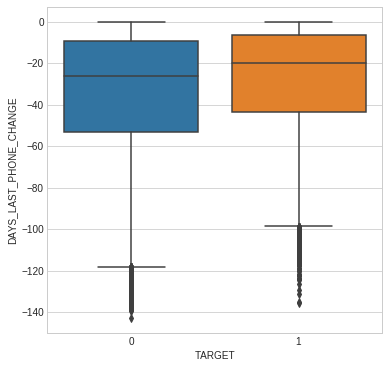

In [52]:
plt.figure(figsize=(6,6))
sns.boxplot(x='TARGET', y='DAYS_LAST_PHONE_CHANGE', data=phone_change)

From the above plot, it can be said that the potential defaulters are more likely to change their phone numbers before applying for the loan.

#### NAME_CONTRACT_TYPE:

In [53]:
appl_data['NAME_CONTRACT_TYPE'].value_counts(normalize=True)*100
# We can see that only 10% of the loans are in fact Revolving loans (credit cards), the rest beings Cash loans.

Cash loans         90.478715
Revolving loans     9.521285
Name: NAME_CONTRACT_TYPE, dtype: float64

In [54]:
# Total number of applicants:
nm_contract = appl_data['NAME_CONTRACT_TYPE'].value_counts()
nm_contract = pd.DataFrame({'contract':nm_contract.index, 'count_total':nm_contract.values})

# Number of applicants with difficulty in repaying loans:
nm_contract_1 = appl_data['TARGET'].groupby(appl_data['NAME_CONTRACT_TYPE']).sum()
nm_contract_1 = pd.DataFrame({'contract':nm_contract_1.index, 'count_default':nm_contract_1.values})

# Merging them together:
nm_contract = nm_contract.merge(nm_contract_1, how='inner', on='contract')

# Adding a new column for percentage:
nm_contract['percentage'] = round((nm_contract['count_default']/nm_contract['count_total']*100),2)
nm_contract

,contract,count_total,count_default,percentage
0,Cash loans,278232,23221,8.35
1,Revolving loans,29279,1604,5.48


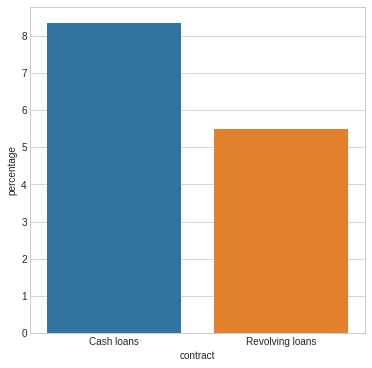

In [55]:
# Plotting:
plt.figure(figsize = (6,6))
sns.barplot(x='contract', y='percentage', data=nm_contract)

People who take Cash loans are more likely to default on loans than the people who take revolving loans.

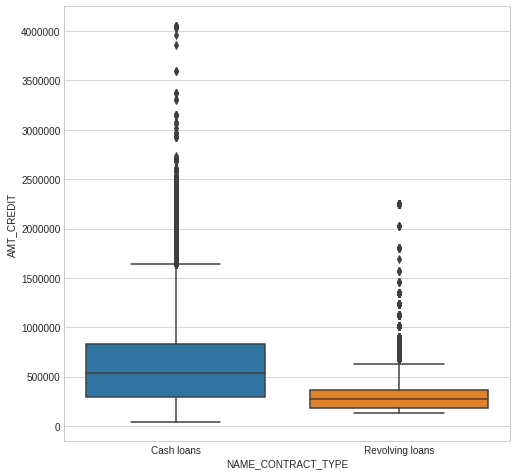

In [56]:
# To see average AMT_CREDIT with each type of loan:
amt_credit_loan_typ = appl_data[['AMT_CREDIT', 'TARGET', 'NAME_CONTRACT_TYPE']]

plt.figure(figsize = (8,8))
sns.boxplot(x='NAME_CONTRACT_TYPE', y='AMT_CREDIT', data=amt_credit_loan_typ)

Sincethere are outliers, let us zoom in the plot to understand it better

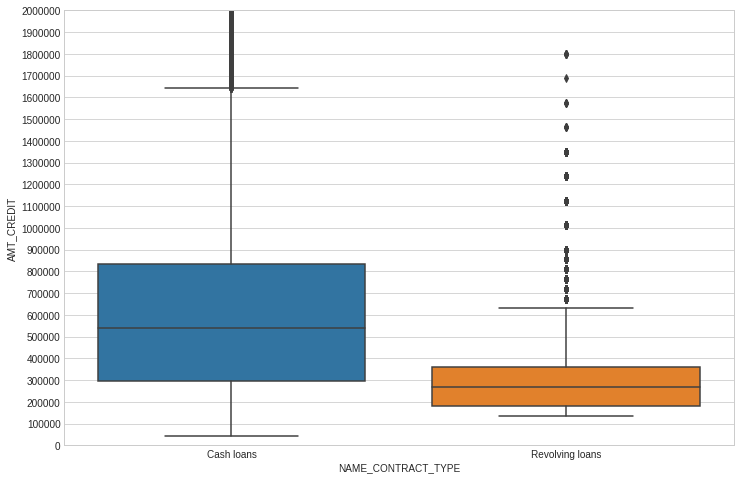

In [57]:
plt.figure(figsize = (12,8))
sns.boxplot(x='NAME_CONTRACT_TYPE', y='AMT_CREDIT', data=amt_credit_loan_typ)
plt.ylim([0,2000000])
plt.yticks([i for i in range(0,2000001,100000)])
plt.show()

The above plot clearly tells us that the distribution of cash loans is completely different from that of Revolving loans with much higher quantile values.<br>
Also the range for revolving loans is highly limited as compared to the Cash loans.

#### AMT_INCOME_TOTAL:
Total income of the client

In [58]:
# Looking at the distribution:
appl_data['AMT_INCOME_TOTAL'].min() # 25650
appl_data['AMT_INCOME_TOTAL'].max() # 117,000,000

117000000.0

Since there is such a huge gap between the two values, let us look at the second highest values and so on:

In [59]:
(appl_data['AMT_INCOME_TOTAL'].sort_values(ascending = False)).head(15)

12840     117000000.0
203693     18000090.0
246858     13500000.0
77768       9000000.0
131127      6750000.0
204564      4500000.0
103006      4500000.0
187833      4500000.0
287463      4500000.0
181698      3950059.5
20216       3825000.0
49645       3600000.0
284311      3600000.0
82846       3375000.0
86026       3375000.0
Name: AMT_INCOME_TOTAL, dtype: float64

From the above categorisation, let us categorise the income variable into slots of 10 lakh rupees each

In [60]:
income = appl_data[['TARGET', 'AMT_INCOME_TOTAL']]
# Rounding the income variable to the nearest digit:
income['AMT_INCOME_TOTAL'] = round(income['AMT_INCOME_TOTAL'], 0)

# Changing the datatype to integer, so that we can iterate over it:
income['AMT_INCOME_TOTAL'] = income['AMT_INCOME_TOTAL'].astype(int)
income.head()

/home/savan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/savan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,TARGET,AMT_INCOME_TOTAL
0,1,202500
1,0,270000
2,0,67500
3,0,135000
4,0,121500


In [61]:
(income['AMT_INCOME_TOTAL'].sort_values(ascending = False)).head(15)

12840     117000000
203693     18000090
246858     13500000
77768       9000000
131127      6750000
204564      4500000
103006      4500000
187833      4500000
287463      4500000
181698      3950060
20216       3825000
49645       3600000
284311      3600000
82846       3375000
86026       3375000
Name: AMT_INCOME_TOTAL, dtype: int64

In [62]:
income_list = []

for i in income['AMT_INCOME_TOTAL']:
    if i>=0 and i<1000000:
        income_list.append('0-10lakhs')
    elif i>=1000000 and i<2000000:
        income_list.append('10-20lakhs')
    elif i>=2000000 and i<3000000:
        income_list.append('20-30lakhs')
    elif i>=3000000 and i<4000000:
        income_list.append('30-40lakhs')
    elif i>=4000000 and i<5000000:
        income_list.append('40-50lakhs')
    elif i>=5000000 and i<6000000:
        income_list.append('50-60lakhs')
    elif i>=6000000 and i<7000000:
        income_list.append('60-70lakhs')
    elif i>=7000000 and i<8000000:
        income_list.append('70-80lakhs')
    elif i>=8000000 and i<9000000:
        income_list.append('80-90lakhs')
    elif i>=9000000 and i<10000000:
        income_list.append('90-100lakhs')
    elif i>=10000000:
        income_list.append('100lakhs+')
        
income['Income Group'] = income_list

/home/savan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [63]:
income['Income Group'].value_counts()

0-10lakhs      307261
10-20lakhs        206
20-30lakhs         27
30-40lakhs          8
40-50lakhs          4
100lakhs+           3
60-70lakhs          1
90-100lakhs         1
Name: Income Group, dtype: int64

We can see that the number of applicants with income above 10 laks is very menial. Therefore, let us re-arrange our grouping to Rs 1 lakh each for the group 0-10 lakhs.

In [64]:
# Firstly, let us remove the applicants whose salary is more than 10 lakhs:
income = income[income['AMT_INCOME_TOTAL']<1000001]
income['Income Group'].value_counts()

0-10lakhs    307261
Name: Income Group, dtype: int64

Redefining the 'Income Group' variable

In [65]:
# Dropping the income group column:
income.drop('Income Group', axis='columns', inplace=True)

# redefining the income_list:
income_list = []

for i in income['AMT_INCOME_TOTAL']:
    if i>=0 and i<100000:
        income_list.append('0-1lakh')
    elif i>=100000 and i<200000:
        income_list.append('1-2lakh')
    elif i>=200000 and i<300000:
        income_list.append('2-3lakh')
    elif i>=300000 and i<400000:
        income_list.append('3-4lakh')
    elif i>=400000 and i<500000:
        income_list.append('4-5lakh')
    elif i>=500000 and i<600000:
        income_list.append('5-6lakh')
    elif i>=600000 and i<700000:
        income_list.append('6-7lakh')
    elif i>=700000 and i<800000:
        income_list.append('7-8lakh')
    elif i>=800000 and i<900000:
        income_list.append('8-9lakh')
    elif i>=900000 and i<1000000:
        income_list.append('9-10lakh')

# Assigning the column:
income['Income Group'] = income_list
income['Income Group'].value_counts()

1-2lakh     155898
2-3lakh      65176
0-1lakh      63698
3-4lakh      14676
4-5lakh       5361
5-6lakh       1095
6-7lakh        869
9-10lakh       202
7-8lakh        162
8-9lakh        124
Name: Income Group, dtype: int64

In [66]:
# Total applicants:
income_tot = income['Income Group'].value_counts()
income_tot = pd.DataFrame({'Income Group':income_tot.index, 'Count_total':income_tot.values})

# Defaulters:
income_dflt = income['TARGET'].groupby(income['Income Group']).sum()
income_dflt = pd.DataFrame({'Income Group':income_dflt.index, 'Count_default':income_dflt.values})

# Merging:
income_tot = income_tot.merge(income_dflt, how='inner', on='Income Group')
# Percentage:
income_tot['percentage_default'] = round((income_tot['Count_default']/income_tot['Count_total'])*100, 2)
income_tot

,Income Group,Count_total,Count_default,percentage_default
0,1-2lakh,155898,13326,8.55
1,2-3lakh,65176,4921,7.55
2,0-1lakh,63698,5225,8.20
3,3-4lakh,14676,885,6.03
4,4-5lakh,5361,322,6.01
5,5-6lakh,1095,69,6.30
6,6-7lakh,869,42,4.83
7,9-10lakh,202,11,5.45
8,7-8lakh,162,3,1.85
9,8-9lakh,124,8,6.45


Text(0.5,1,'Income Bracket vs Percentage Default')

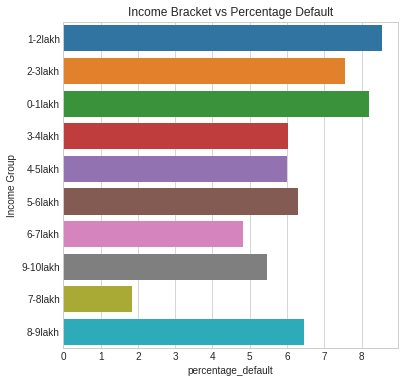

In [67]:
# Plotting:
plt.figure(figsize=(6,6))
sns.barplot(x='percentage_default', y='Income Group', data=income_tot)
plt.title('Income Bracket vs Percentage Default')

From the above plot we can see that the following income groups are the most likely to default:<br>
1. 1-2 lakhs (8.5%)<br>
2. 0-1 lakh (8.20%)<br>
3. 2-3 lakh (7.55%)<br>
4. 8-9 lakh (6.45%)<br>
5. 5-6 lakh (6.30%)<br>

It is interesting to see that the income group 8-9 lakhs has a higher rate of default, whereas the income group 7-8 lakh has the lowest rate of default (1.85%) among all groups.<br>
This shows that 8 lakhs marks the boundary between the middle class housholds and the upper-middle class households. A typical middle class salaryman is therefore the least likely to default on loans.

#### AMT_GOODS_PRICE

In [68]:
appl_data['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [69]:
goods = appl_data[['TARGET', 'AMT_GOODS_PRICE']]

# Removing missing values:
goods = goods[~goods['AMT_GOODS_PRICE'].isnull()]

In [70]:
goods['AMT_GOODS_PRICE'].min()  # 40500
goods['AMT_GOODS_PRICE'].max() # 4050000

4050000.0

Since the variation is huge, let us take a look at the distribution of the variable:

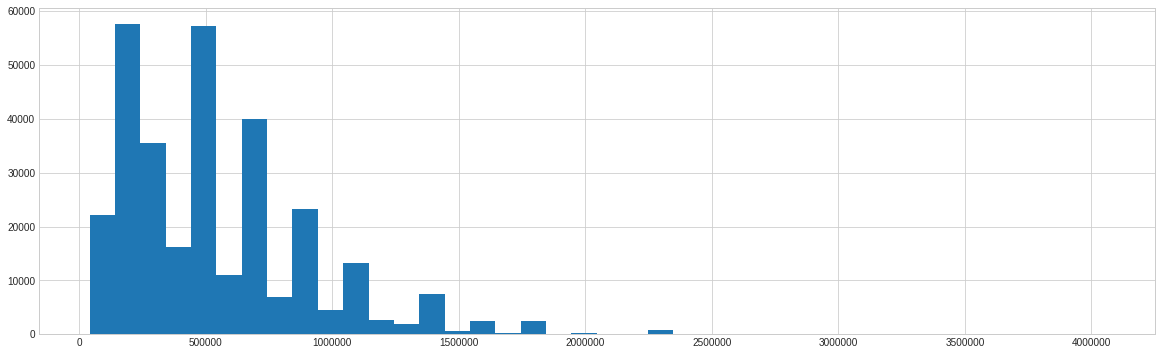

In [71]:
plt.figure(figsize=(20,6))
x=goods['AMT_GOODS_PRICE']
plt.hist(x, bins=40)
plt.show()

We can see that the majority of the values lie below 15 lakh. Therefore we'll create a new column that has 5 categories each having a range of 3 lakh rupees. 

In [72]:
goods_list = []

for i in goods['AMT_GOODS_PRICE']:
    if i>=0 and i<300000:
        goods_list.append('0-3lakh')
    elif i>= 300000 and i<600000:
        goods_list.append('3-6lakh')
    elif i>= 600000 and i<900000:
        goods_list.append('6-9lakh')
    elif i>= 600000 and i<900000:
        goods_list.append('6-9lakh')
    elif i>= 900000 and i<1200000:
        goods_list.append('9-12lakh')
    elif i>= 1200000 and i<1500000:
        goods_list.append('12-15lakh')
    else:
        goods_list.append('15lakh+')
        
goods['Price Range'] = goods_list
goods['Price Range'].value_counts()

0-3lakh      104426
3-6lakh       91309
6-9lakh       54202
9-12lakh      39694
12-15lakh     10688
15lakh+        6914
Name: Price Range, dtype: int64

In [73]:
# Total applicants:
goods_tot = goods['Price Range'].value_counts()
goods_tot = pd.DataFrame({'Price Range':goods_tot.index, 'Count_total':goods_tot.values})

# Defaulters:
goods_dflt = goods['TARGET'].groupby(goods['Price Range']).sum()
goods_dflt = pd.DataFrame({'Price Range':goods_dflt.index, 'Count_default':goods_dflt.values})

# Merging:
goods_tot = goods_tot.merge(goods_dflt, how='inner', on='Price Range')
# Percentage:
goods_tot['percentage_default'] = round((goods_tot['Count_default']/goods_tot['Count_total'])*100, 2)
goods_tot

,Price Range,Count_total,Count_default,percentage_default
0,0-3lakh,104426,8343,7.99
1,3-6lakh,91309,9110,9.98
2,6-9lakh,54202,4162,7.68
3,9-12lakh,39694,2412,6.08
4,12-15lakh,10688,494,4.62
5,15lakh+,6914,283,4.09


Text(0.5,1,'Amount Goods Price vs Percentage default')

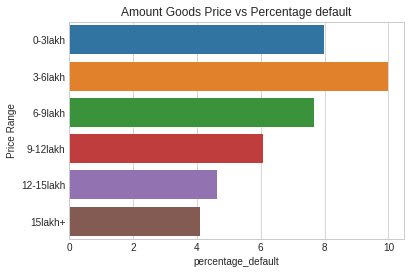

In [74]:
# Plotting:
plt.figure(figsize=(6,4))
sns.barplot(x='percentage_default', y='Price Range', data=goods_tot)
plt.title('Amount Goods Price vs Percentage default')

We can see that the applicants in the range of 3-6 lakhs are the most likely to default with their rate of default being 10%. They are followed by the groups 0-3 lakh and 6-9 lakh both more or less at the same footing.<br>

It is interesting to note that the applicants with higher goods_price tend to default less.

#### NAME_FAMILY_STATUS:

In [75]:
# Distribution of the data:
appl_data['NAME_FAMILY_STATUS'].value_counts(normalize=True)*100

Married                 63.878040
Single / not married    14.778008
Civil marriage           9.682580
Separated                6.429038
Widow                    5.231683
Unknown                  0.000650
Name: NAME_FAMILY_STATUS, dtype: float64

In [76]:
# Finding the % across each category:

# Applicants who had problems in repaying the loan:
fam_stat_1 = appl_data['TARGET'].groupby(appl_data['NAME_FAMILY_STATUS']).sum()
fam_stat_1 = pd.DataFrame({'Status':fam_stat_1.index, 'Count_1':fam_stat_1.values})

# Applicants who paid on time:
fam_stat_0 = appl_data['NAME_FAMILY_STATUS'].value_counts()
fam_stat_0 = pd.DataFrame({'Status':fam_stat_0.index, 'Count_0':fam_stat_0.values})

In [77]:
# Merging the two dataframes:
fam_stat = fam_stat_0.merge(fam_stat_1, how='inner', on='Status')

# Adding a column for percentage:
fam_stat['percentage'] = round((fam_stat['Count_1']/fam_stat['Count_0'])*100, 2)
fam_stat

,Status,Count_0,Count_1,percentage
0,Married,196432,14850,7.56
1,Single / not married,45444,4457,9.81
2,Civil marriage,29775,2961,9.94
3,Separated,19770,1620,8.19
4,Widow,16088,937,5.82
5,Unknown,2,0,0.00


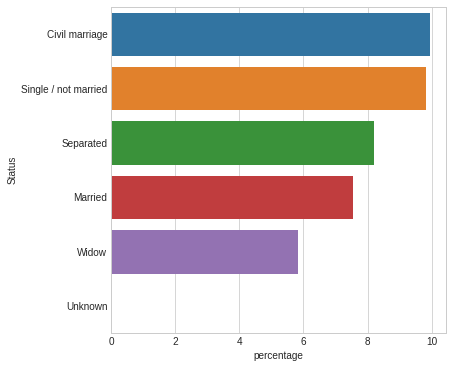

In [78]:
# Sorting the dataframe:
fam_stat = fam_stat.sort_values('percentage', ascending = False)

# Plotting a barplot:
plt.figure(figsize=(6,6))
sns.barplot(y='Status', x='percentage', data=fam_stat)

From the above plot we can say that the widowers are the least likely to default on their loans.<br>
An interesting insight is that of Civil marriages, people can fake their marriages to get lucrative offers on their loans by the bank and eventually default.

#### CODE_GENDER:

In [79]:
appl_data['CODE_GENDER'].value_counts(normalize=True)*100

F      65.834393
M      34.164306
XNA     0.001301
Name: CODE_GENDER, dtype: float64

In [80]:
# Number of applicants for all genders:
gender = appl_data['CODE_GENDER'].value_counts()
gender = pd.DataFrame({'Gender':gender.index, 'Count_total':gender.values})

# Number of applicants who had problems:
gender_1 = appl_data['TARGET'].groupby(appl_data['CODE_GENDER']).sum()
gender_1 = pd.DataFrame({'Gender':gender_1.index, 'Count_default':gender_1.values})

# Merging:
gender = gender.merge(gender_1, how='inner', on='Gender')

# Removing 'XNA' as Gender category:
gender = gender[gender['Gender'].isin(['F', 'M'])]

# Adding a column for percentage:
gender['percentage'] = round((gender['Count_default']/gender['Count_total']*100),2)
gender

,Gender,Count_total,Count_default,percentage
0,F,202448,14170,7.00
1,M,105059,10655,10.14


We can see that a higher number of women have applied for the loan.

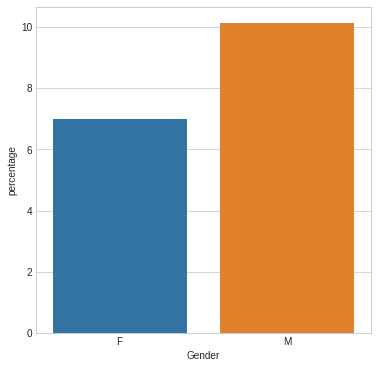

In [81]:
# Plotting:
plt.figure(figsize=(6,6))
sns.barplot(x='Gender', y='percentage', data=gender)

Men are more likely to default on their loan as compared to women even though the number of female applicants is higher.

#### FLAG_OWN_REALTY:

In [82]:
appl_data['FLAG_OWN_REALTY'].value_counts(normalize=True)*100

Y    69.367275
N    30.632725
Name: FLAG_OWN_REALTY, dtype: float64

In [83]:
# Total number of applicants:
realty = appl_data['FLAG_OWN_REALTY'].value_counts()
realty = pd.DataFrame({'Owner of realty':realty.index, 'Count_total':realty.values})

# Number of applicants with problems:
realty_1 = appl_data['TARGET'].groupby(appl_data['FLAG_OWN_REALTY']).sum()
realty_1 = pd.DataFrame({'Owner of realty':realty_1.index, 'Count_default':realty_1.values})

# Merging them together:
realty = realty.merge(realty_1, how='inner', on='Owner of realty')

# Adding a column for percentage:
realty['percentage'] = round((realty['Count_default']/realty['Count_total']*100), 2)
realty

,Owner of realty,Count_total,Count_default,percentage
0,Y,213312,16983,7.96
1,N,94199,7842,8.32


Applicants who own realty are comparatively higher than those who do not

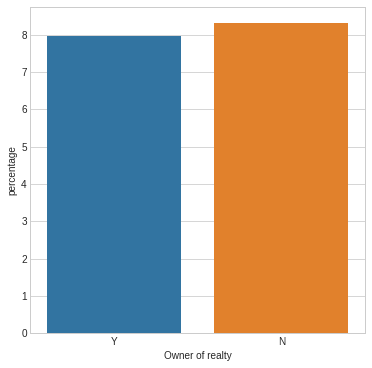

In [84]:
# Plotting:
plt.figure(figsize=(6,6))
sns.barplot(x='Owner of realty', y='percentage', data=realty)

Applicants who do not own realty are more likely to default on payments than those who do even though the number of applicants owning realty is more than twice of those who do not.

#### NAME_EDUCATION_TYPE

In [85]:
appl_data['NAME_EDUCATION_TYPE'].value_counts(normalize=True)*100

Secondary / secondary special    71.018923
Higher education                 24.344820
Incomplete higher                 3.341994
Lower secondary                   1.240931
Academic degree                   0.053331
Name: NAME_EDUCATION_TYPE, dtype: float64

In [86]:
# Total number of applicants:
education = appl_data['NAME_EDUCATION_TYPE'].value_counts()
education = pd.DataFrame({'Education':education.index, 'Count_total':education.values})

# No of applicants likely to default:
education_1 = appl_data['TARGET'].groupby(appl_data['NAME_EDUCATION_TYPE']).sum()
education_1 = pd.DataFrame({'Education':education_1.index, 'Count_default':education_1.values})

# Merging:
education = education.merge(education_1, how='inner', on='Education')

# Percentage:
education['percentage'] = round((education['Count_default']/education['Count_total'])*100, 2)
education = education[~education['Education'].isin(['Academic degree'])]
education

,Education,Count_total,Count_default,percentage
0,Secondary / secondary special,218391,19524,8.94
1,Higher education,74863,4009,5.36
2,Incomplete higher,10277,872,8.48
3,Lower secondary,3816,417,10.93


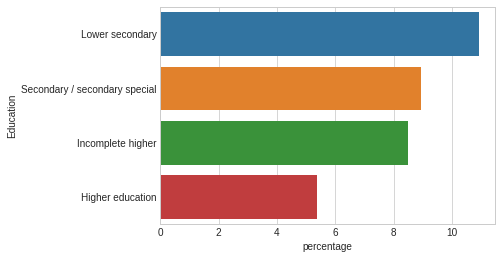

In [87]:
# Plotting:
education = education.sort_values('percentage', ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(y='Education', x='percentage', data = education)

People with higher levels of education have the lowest chances of defaulting on their loans.

#### NAME_INCOME_TYPE:


In [88]:
appl_data['NAME_INCOME_TYPE'].value_counts(normalize=True)*100

Working                 51.631974
Commercial associate    23.289248
Pensioner               18.003258
State servant            7.057634
Unemployed               0.007154
Student                  0.005853
Businessman              0.003252
Maternity leave          0.001626
Name: NAME_INCOME_TYPE, dtype: float64

In [89]:
# Total number of applicants:
income_type = appl_data['NAME_INCOME_TYPE'].value_counts()
income_type = pd.DataFrame({'Income Type':income_type.index, 'Count_total':income_type.values})

# Applicants with problems:
income_type_1 = appl_data['TARGET'].groupby(appl_data['NAME_INCOME_TYPE']).sum()
income_type_1 = pd.DataFrame({'Income Type':income_type_1.index, 'Count_default':income_type_1.values})

# Merging:
income_type = income_type.merge(income_type_1, how='inner', on='Income Type')

# Percentage:
income_type['percentage'] = round((income_type['Count_default']/income_type['Count_total']*100), 2)
income_type

,Income Type,Count_total,Count_default,percentage
0,Working,158774,15224,9.59
1,Commercial associate,71617,5360,7.48
2,Pensioner,55362,2982,5.39
3,State servant,21703,1249,5.75
4,Unemployed,22,8,36.36
5,Student,18,0,0.00
6,Businessman,10,0,0.00
7,Maternity leave,5,2,40.00


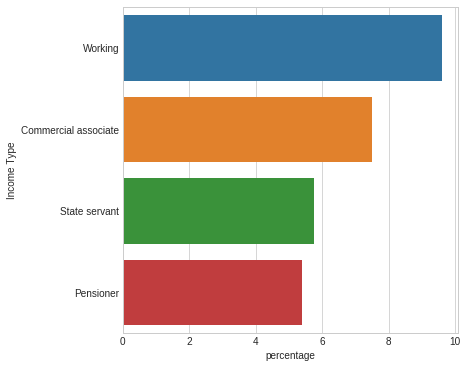

In [90]:
# Removing some categories which have really low applications:
income_type = income_type[~income_type['Income Type'].isin(['Maternity leave', 'Businessman',
                                                           'Student', 'Unemployed'])]

# Sorting the values:
income_type = income_type.sort_values('percentage', ascending = False)

# Plotting:
plt.figure(figsize = (6,6))
sns.barplot(y='Income Type', x='percentage', data=income_type)

As we can see that contrary to what people may feel, but pensioners are the least likely to default on their loans.

#### CNT_CHILDREN

In [91]:
appl_data['CNT_CHILDREN'].value_counts(normalize=True)*100

0     70.036844
1     19.875387
2      8.698551
3      1.208737
4      0.139507
5      0.027316
6      0.006829
7      0.002276
14     0.000976
19     0.000650
12     0.000650
10     0.000650
9      0.000650
8      0.000650
11     0.000325
Name: CNT_CHILDREN, dtype: float64

In [92]:
# Total number of applicants:
children =  appl_data['CNT_CHILDREN'].value_counts()
children = pd.DataFrame({'Number of kids':children.index, 'Count_total':children.values})

# Applicants who have problems:
children_1 = appl_data['TARGET'].groupby(appl_data['CNT_CHILDREN']).sum()
children_1 = pd.DataFrame({'Number of kids':children_1.index, 'Count_default':children_1.values})

# Merging:
children = children.merge(children_1, how='inner', on='Number of kids')

# Percentage:
children['percentage'] = round((children['Count_default']/children['Count_total'])*100, 2)
children

,Number of kids,Count_total,Count_default,percentage
0,0,215371,16609,7.71
1,1,61119,5454,8.92
2,2,26749,2333,8.72
3,3,3717,358,9.63
4,4,429,55,12.82
5,5,84,7,8.33
6,6,21,6,28.57
7,7,7,0,0.00
8,14,3,0,0.00
9,19,2,0,0.00


In [93]:
# Removing the rows where the magnitude is too less to do an actual analysis:
children = children[children['Number of kids'].isin([0,1,2,3,4,5,6])]
children

,Number of kids,Count_total,Count_default,percentage
0,0,215371,16609,7.71
1,1,61119,5454,8.92
2,2,26749,2333,8.72
3,3,3717,358,9.63
4,4,429,55,12.82
5,5,84,7,8.33
6,6,21,6,28.57


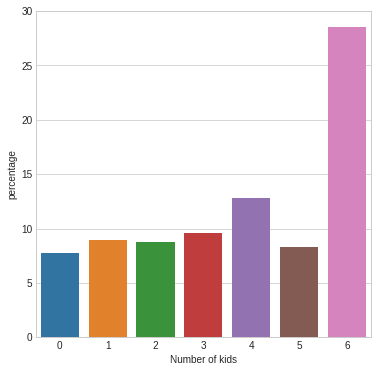

In [94]:
# Plotting:
children = children.sort_values('percentage', ascending=False)

plt.figure(figsize=(6,6))
sns.barplot(x='Number of kids', y='percentage', data=children)

It can be seen that the risk of defaulting on the loan increases with the number of kids.

#### NAME_HOUSING_TYPE

In [95]:
appl_data['NAME_HOUSING_TYPE'].value_counts(normalize=True)*100

House / apartment      88.734387
With parents            4.825844
Municipal apartment     3.636618
Rented apartment        1.587260
Office apartment        0.851026
Co-op apartment         0.364865
Name: NAME_HOUSING_TYPE, dtype: float64

In [96]:
housing = appl_data['NAME_HOUSING_TYPE'].value_counts()
housing = pd.DataFrame({'Type of House':housing.index, 'Count_total':housing.values})

housing_1 = appl_data['TARGET'].groupby(appl_data['NAME_HOUSING_TYPE']).sum()
housing_1 = pd.DataFrame({'Type of House':housing_1.index, 'Count_default':housing_1.values})

# Merging:
housing = housing.merge(housing_1, how='inner', on='Type of House')

# Percentage:
housing['percentage'] = round((housing['Count_default']/housing['Count_total'])*100, 2)

# Sorting:
housing = housing.sort_values('percentage', ascending = False)
housing

,Type of House,Count_total,Count_default,percentage
3,Rented apartment,4881,601,12.31
1,With parents,14840,1736,11.70
2,Municipal apartment,11183,955,8.54
5,Co-op apartment,1122,89,7.93
0,House / apartment,272868,21272,7.80
4,Office apartment,2617,172,6.57


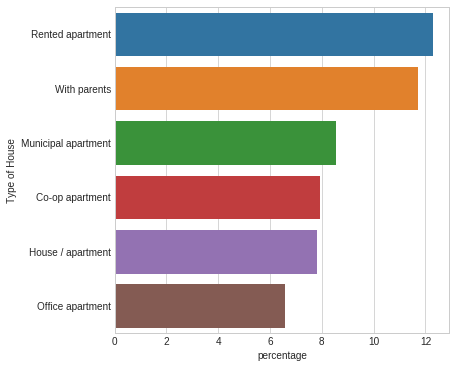

In [97]:
# Plotting:
plt.figure(figsize=(6,6))
sns.barplot(y='Type of House', x='percentage', data=housing)

People with their own homes or the ones provided by their firm are the least likely to default on loans whereas applicants who have dependency on others in terms of housing are more likely to default. 

#### DAYS_EMPLOYED:

In [98]:
appl_data['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

We can see that there are some positive values for this column, analyzing it further

In [99]:
appl_data[appl_data['DAYS_EMPLOYED']>0]['NAME_INCOME_TYPE'].value_counts()

Pensioner     55352
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

Since these are all pensioners and unemployed people with no source of income, it is better to remove them from our analysis for this part as inclusion of these categories may distort our findings.

In [100]:
# Adding a new column to the dataframe:
appl_data['Years worked'] = round(appl_data['DAYS_EMPLOYED']/365, 0)
appl_data['Years worked'].describe()

count    307511.000000
mean        174.895337
std         387.185661
min         -49.000000
25%          -8.000000
50%          -3.000000
75%          -1.000000
max        1001.000000
Name: Years worked, dtype: float64

In [101]:
appl_data['Years worked'] = appl_data['Years worked'].astype(int)
appl_data['Years worked'] = appl_data['Years worked'].astype(str)
appl_data['Years worked'] = appl_data['Years worked'].str.replace('-', '')
appl_data['Years worked'] = appl_data['Years worked'].astype(int)
appl_data['Years worked'].head()

0    2
1    3
2    1
3    8
4    8
Name: Years worked, dtype: int64

In [102]:
# Adding another column called 'Years worked in decades':
(appl_data['Years worked'].sort_values(ascending=False)).unique()

work_dec = []

for i in appl_data['Years worked']:
    if i >=0 and i<10:
        work_dec.append(1)
    elif i>=10 and i<20:
        work_dec.append(2)
    elif i>=20 and i<=30:
        work_dec.append(3)
    elif i>=30 and i<40:
        work_dec.append(4)
    elif i>=40 and i<50:
        work_dec.append(5)
    else:
        work_dec.append(1001)

In [103]:
appl_data['Years worked in decades'] = work_dec

In [104]:
appl_data['Years worked in decades'].value_counts()

1       196727
1001     55374
2        41938
3        10721
4         2467
5          284
Name: Years worked in decades, dtype: int64

In [105]:
employ = appl_data[['TARGET', 'DAYS_EMPLOYED', 'OCCUPATION_TYPE', 'NAME_INCOME_TYPE', 'Years worked in decades']]

# Removing pensioners and unemployed applicants:
employ = employ[~employ['NAME_INCOME_TYPE'].isin(['Pensioner', 'Unemployed'])]
employ['Years worked in decades'].value_counts()

1    196721
2     41937
3     10720
4      2465
5       284
Name: Years worked in decades, dtype: int64

In [106]:
# Total number of applicants:
work = employ['Years worked in decades'].value_counts()
work = pd.DataFrame({'Year group':work.index, 'Count_total':work.values})

# Potential Defaulters:
work_1 = employ['TARGET'].groupby(employ['Years worked in decades']).sum()
work_1 = pd.DataFrame({'Year group':work_1.index, 'Count_default':work_1.values})

# Merging:
work = work.merge(work_1, how='inner', on='Year group')

# Percentage:
work['percentage'] = round((work['Count_default']/work['Count_total'])*100, 2)
work

,Year group,Count_total,Count_default,percentage
0,1,196721,18922,9.62
1,2,41937,2338,5.58
2,3,10720,491,4.58
3,4,2465,81,3.29
4,5,284,3,1.06


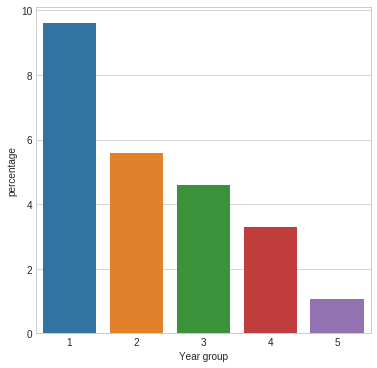

In [107]:
work = work.sort_values('percentage', ascending=False)

plt.figure(figsize=(6,6))
sns.barplot(y='percentage', x='Year group', data=work)

We can see that the defaulting on payments is much higher in the applicants who have been working for less than a decade.  

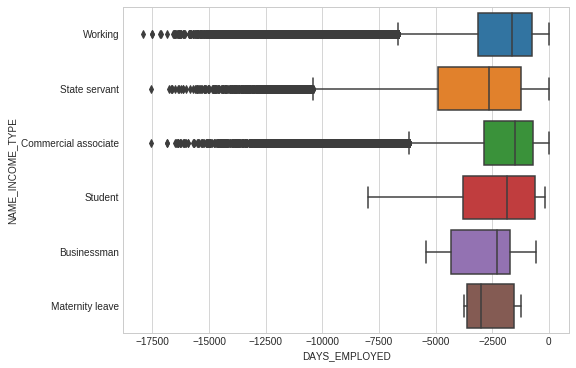

In [108]:
plt.figure(figsize=(8,6))
sns.boxplot(y='NAME_INCOME_TYPE', x='DAYS_EMPLOYED', data=employ)

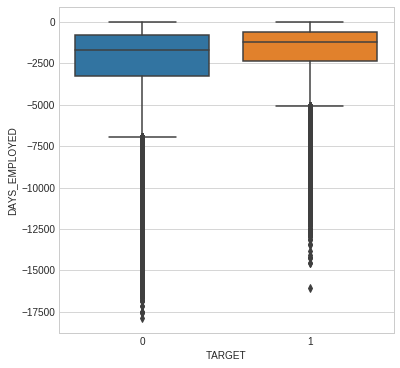

In [109]:
# Total number of applicants without payment problems:
plt.figure(figsize=(6,6))
sns.boxplot(x='TARGET', y='DAYS_EMPLOYED', data=employ)

It can be seen that people who have problems with paying their loans on time have on average a lower period of employment and hence struggle ensues.

#### DAYS_BIRTH:

In [110]:
appl_data['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

Adding a new clumn which calculates the age of the applicant in years

In [111]:
appl_data['Applicant Age'] = appl_data['DAYS_BIRTH']
# Rounding the age off to the nearest number:
appl_data['Applicant Age'] = round(appl_data['Applicant Age']/365, 0)
appl_data['Applicant Age'].describe()

count    307511.000000
mean        -43.938646
std          11.964047
min         -69.000000
25%         -54.000000
50%         -43.000000
75%         -34.000000
max         -21.000000
Name: Applicant Age, dtype: float64

In [112]:
appl_data['Applicant Age'].head()

0   -26.0
1   -46.0
2   -52.0
3   -52.0
4   -55.0
Name: Applicant Age, dtype: float64

In [113]:
# Converting the datatype to integer:
appl_data['Applicant Age'] = appl_data['Applicant Age'].astype(int)
appl_data['Applicant Age'].head()

0   -26
1   -46
2   -52
3   -52
4   -55
Name: Applicant Age, dtype: int64

In [114]:
# Converting the datatype to string:
appl_data['Applicant Age'] = appl_data['Applicant Age'].astype(str)

# Removing the minus sign:
appl_data['Applicant Age'] = appl_data['Applicant Age'].str.replace('-', '')

appl_data['Applicant Age'].describe()

count     307511
unique        49
top           39
freq        9023
Name: Applicant Age, dtype: object

In [115]:
# Converting the metric back to integer for further computations:
appl_data['Applicant Age'] = appl_data['Applicant Age'].astype(int)

In [116]:
appl_data['Applicant Age'].max()

69

In [117]:
# Applicant age in decades:
age_decade = []
for i in appl_data['Applicant Age']:
    if i>=20 and i<30:
        age_decade.append(2)
    elif i>=30 and i<40:
        age_decade.append(3)
    elif i>=40 and i<50:
        age_decade.append(4)
    elif i>=50 and i<60:
        age_decade.append(5)
    elif i>=60 and i<70:
        age_decade.append(6)

In [118]:
# Adding the list as a column to the dataframe:
appl_data['Applicant Age in Decades'] = age_decade

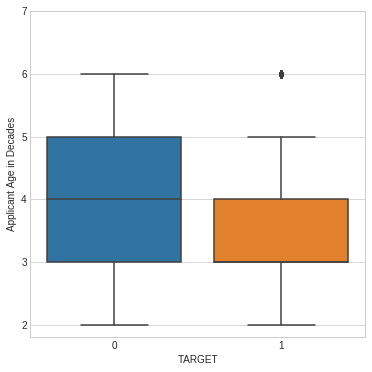

In [119]:
plt.figure(figsize=(6,6))
sns.boxplot(x='TARGET', y='Applicant Age in Decades', data=appl_data)
plt.yticks([2,3,4,5,6,7])
plt.show()

From the above plot it can be said that applicants who are in their 4th decade (below the age of 50) are more likely to default on their payments. However it is not a very precise argument and does not tell us much. Analyzing it further.

In [120]:
appl_data[appl_data['TARGET']==1]['Applicant Age in Decades'].describe()

count    24825.000000
mean         3.625660
std          1.192249
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: Applicant Age in Decades, dtype: float64

In [121]:
birth = appl_data[['TARGET', 'Applicant Age in Decades']]
birth = birth['TARGET'].groupby(birth['Applicant Age in Decades']).sum()
birth = pd.DataFrame({'Age group':birth.index, 'Count':birth.values})
birth

,Age group,Count
0,2,4708
1,3,7972
2,4,5983
3,5,4229
4,6,1933


In [122]:
birth_1 = appl_data['Applicant Age in Decades'].value_counts()
birth_1 = pd.DataFrame({'Age group':birth_1.index, 'Count_total':birth_1.values})

# Merging:
birth = birth.merge(birth_1, how='inner', on='Age group')

# Percentage:
birth['percentage'] = round((birth['Count']/birth['Count_total'])*100, 2)
birth

,Age group,Count,Count_total,percentage
0,2,4708,41093,11.46
1,3,7972,81944,9.73
2,4,5983,77415,7.73
3,5,4229,68039,6.22
4,6,1933,39020,4.95


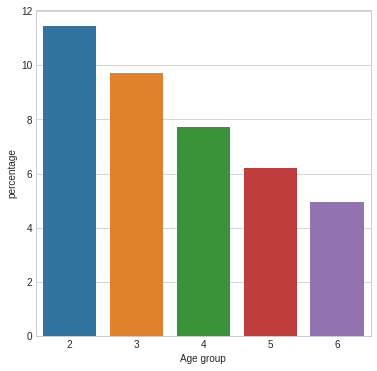

In [123]:
birth = birth.sort_values('percentage', ascending = False)

plt.figure(figsize=(6,6))
sns.barplot(y='percentage', x='Age group', data = birth)

From the above plot we can pin point the age group which is more likely to default on payments. It can be seen that applicants in their 20's have around 11.5% chance of default whereas it keeps on decreasing with age. <br>
A thorough vetting of applicants within 20-30 years of age should be done before approving their loans.

#### Relation with the type of loan:

In [124]:
contract_age = appl_data[['NAME_CONTRACT_TYPE', 'TARGET', 'Applicant Age in Decades']]
contract_age['TARGET'].groupby([appl_data['Applicant Age in Decades'],
                                appl_data['NAME_CONTRACT_TYPE']]).sum()

Applicant Age in Decades  NAME_CONTRACT_TYPE
2                         Cash loans            4187
                          Revolving loans        521
3                         Cash loans            7527
                          Revolving loans        445
4                         Cash loans            5631
                          Revolving loans        352
5                         Cash loans            4019
                          Revolving loans        210
6                         Cash loans            1857
                          Revolving loans         76
Name: TARGET, dtype: int64

Across all age groups, Cash loans are moe popular and the most defaulted at.

#### FLAG_DOCUMENT's

In [125]:
appl_data['FLAG_DOCUMENT_3'].value_counts(normalize = True)*100

1    71.002338
0    28.997662
Name: FLAG_DOCUMENT_3, dtype: float64

In [126]:
# Total number of applicants:
flag_document_3 = appl_data['FLAG_DOCUMENT_3'].value_counts()
flag_document_3 = pd.DataFrame({'Doc provided':flag_document_3.index, 'Count_total':flag_document_3.values})

# People with problems:
flag_document_3_1 = appl_data['TARGET'].groupby(appl_data['FLAG_DOCUMENT_3']).sum()
flag_document_3_1 = pd.DataFrame({'Doc provided':flag_document_3_1.index, 'Count_default':flag_document_3_1.values})

# Merging:
flag_document_3 = flag_document_3.merge(flag_document_3_1, how='inner', on='Doc provided')

# Percentage:
flag_document_3['percentage'] = round(((flag_document_3['Count_default']/flag_document_3['Count_total'])*100), 2)
flag_document_3

,Doc provided,Count_total,Count_default,percentage
0,1,218340,19312,8.84
1,0,89171,5513,6.18


In [127]:
def flag_y_n(col):
    # Total number of applicants:
    flag_document_3 = appl_data[col].value_counts()
    flag_document_3 = pd.DataFrame({'Doc provided':flag_document_3.index, 'Count_total':flag_document_3.values})

    # People with problems:
    flag_document_3_1 = appl_data['TARGET'].groupby(appl_data[col]).sum()
    flag_document_3_1 = pd.DataFrame({'Doc provided':flag_document_3_1.index, 'Count_default':flag_document_3_1.values})

    # Merging:
    flag_document_3 = flag_document_3.merge(flag_document_3_1, how='inner', on='Doc provided')

    # Percentage:
    flag_document_3['percentage'] = round(((flag_document_3['Count_default']/flag_document_3['Count_total'])*100), 2)
    return(flag_document_3)

In [128]:
for i in ['FLAG_DOCUMENT_2',
'FLAG_DOCUMENT_3',
'FLAG_DOCUMENT_4',
'FLAG_DOCUMENT_5',
'FLAG_DOCUMENT_6',
'FLAG_DOCUMENT_7',
'FLAG_DOCUMENT_8',
'FLAG_DOCUMENT_9',
'FLAG_DOCUMENT_10',
'FLAG_DOCUMENT_11',
'FLAG_DOCUMENT_12',
'FLAG_DOCUMENT_13',
'FLAG_DOCUMENT_14',
'FLAG_DOCUMENT_15',
'FLAG_DOCUMENT_16',
'FLAG_DOCUMENT_17',
'FLAG_DOCUMENT_18',
'FLAG_DOCUMENT_19',
'FLAG_DOCUMENT_20',
'FLAG_DOCUMENT_21']:
    print('Analysis for ' + str(i))
    print(flag_y_n(i))
    print('\n')

Analysis for FLAG_DOCUMENT_2
   Doc provided  Count_total  Count_default  percentage
0             0       307498          24821        8.07
1             1           13              4       30.77


Analysis for FLAG_DOCUMENT_3
   Doc provided  Count_total  Count_default  percentage
0             1       218340          19312        8.84
1             0        89171           5513        6.18


Analysis for FLAG_DOCUMENT_4
   Doc provided  Count_total  Count_default  percentage
0             0       307486          24825        8.07
1             1           25              0        0.00


Analysis for FLAG_DOCUMENT_5
   Doc provided  Count_total  Count_default  percentage
0             0       302863          24453        8.07
1             1         4648            372        8.00


Analysis for FLAG_DOCUMENT_6
   Doc provided  Count_total  Count_default  percentage
0             0       280433          23318        8.31
1             1        27078           1507        5.57


Analy

#### EXT_SOURCE_2 and 3:

Text(0.5,1,'Distribution of EXTR_SOURCE_3 for applicants')

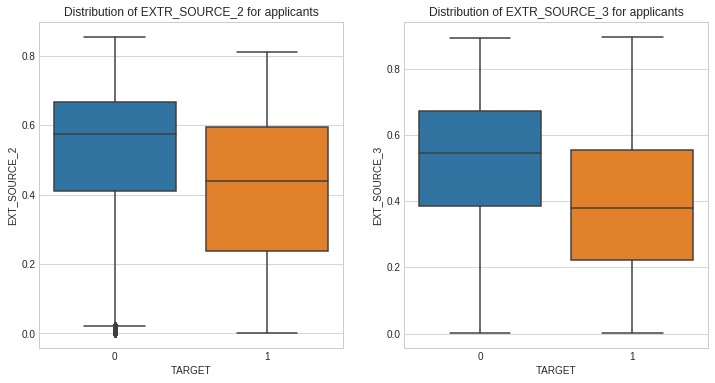

In [129]:
plt.figure(figsize=(12,6))

plt.subplot(121)
sns.boxplot(x='TARGET', y='EXT_SOURCE_2', data=appl_data)
plt.title('Distribution of EXTR_SOURCE_2 for applicants')


plt.subplot(122)
sns.boxplot(x='TARGET', y='EXT_SOURCE_3', data=appl_data)
plt.title('Distribution of EXTR_SOURCE_3 for applicants')

It can be seen that the applicants with problems in repaying the money have significantly lower ratings.

#### FLAG_OWN_CAR

In [130]:
# Total applicants:
car = appl_data['FLAG_OWN_CAR'].value_counts()
car = pd.DataFrame({'Car ownership':car.index, 'Count_total':car.values})

# Applicants with problems:
car_1 = appl_data['TARGET'].groupby(appl_data['FLAG_OWN_CAR']).sum()
car_1 = pd.DataFrame({'Car ownership':car_1.index, 'Count_default':car_1.values})

# Merging:
car = car.merge(car_1, how='inner', on='Car ownership')

# Percentage:
car['percentage'] = round((car['Count_default']/car['Count_total'])*100, 2)
car

,Car ownership,Count_total,Count_default,percentage
0,N,202924,17249,8.50
1,Y,104587,7576,7.24


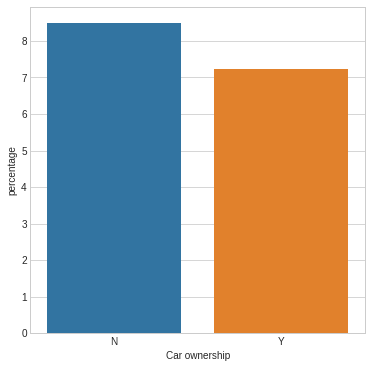

In [131]:
# Plotting:
plt.figure(figsize=(6,6))
sns.barplot(x='Car ownership', y='percentage', data=car)

It can be said that the people who do not own their cars are more likely to default.

#### ORGANIZATION_TYPE

In [132]:
appl_data['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [133]:
# Total applicants:
org_typ = appl_data['ORGANIZATION_TYPE'].value_counts()
org_typ = pd.DataFrame({'Organization':org_typ.index, 'Count_total':org_typ.values})

# Applicants with problems:
org_typ_1 = appl_data['TARGET'].groupby(appl_data['ORGANIZATION_TYPE']).sum()
org_typ_1 = pd.DataFrame({'Organization':org_typ_1.index, 'Count_default':org_typ_1.values})

# Merging:
org_typ = org_typ.merge(org_typ_1, how='inner', on='Organization')

# Percentage:
org_typ['percentage'] = round((org_typ['Count_default']/org_typ['Count_total'])*100, 2)
org_typ

,Organization,Count_total,Count_default,percentage
0,Business Entity Type 3,67992,6323,9.30
1,XNA,55374,2990,5.40
2,Self-employed,38412,3908,10.17
3,Other,16683,1275,7.64
4,Medicine,11193,737,6.58
5,Business Entity Type 2,10553,900,8.53
6,Government,10404,726,6.98
7,School,8893,526,5.91
8,Trade: type 7,7831,740,9.45
9,Kindergarten,6880,484,7.03


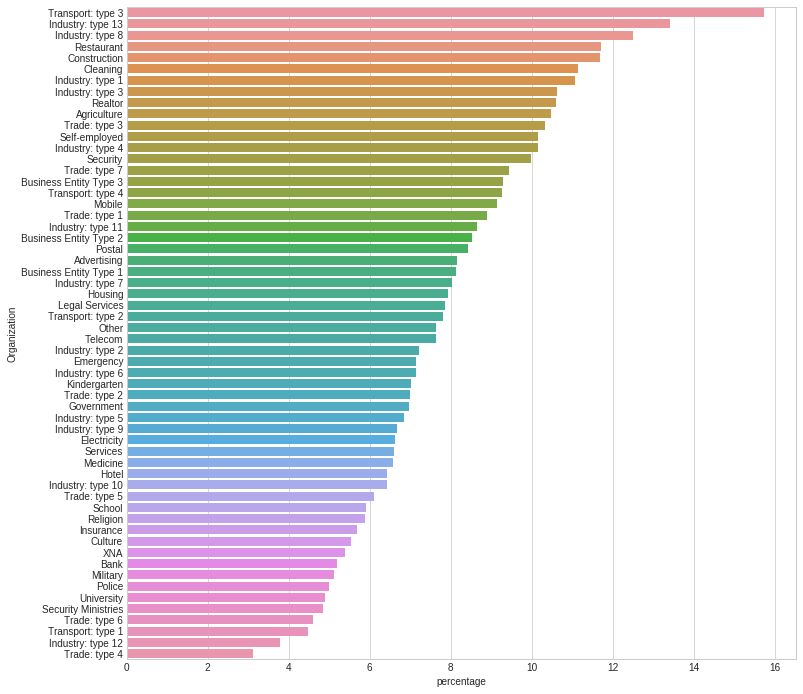

In [134]:
# Sorting the dataframe:
org_typ = org_typ.sort_values('percentage', ascending=False)

# Plotting:
plt.figure(figsize=(12,12))
sns.barplot(y='Organization', x='percentage', data=org_typ)

High end jobs pertaining to Trade, Industry and Transport have the least percentage of likely defaulters followed by jobs in banking, universities, insurance, poice and military personnel.<br>
It can be seen that the applicants in the following categories:<br>
Restaurant, Construction and name other categories are more likely to default.

#### LIVE_CITY_NOT_WORK_CITY:
If the applicant is working at a different place than where he lives.

In [135]:
# Total number of applicants:
city = appl_data['LIVE_CITY_NOT_WORK_CITY'].value_counts()
city = pd.DataFrame({'Working in other city':city.index, 'Count_total':city.values})

# Applicants with problems:
city_1 = appl_data['TARGET'].groupby(appl_data['LIVE_CITY_NOT_WORK_CITY']).sum()
city_1 = pd.DataFrame({'Working in other city':city_1.index, 'Count_default':city_1.values})

# Merging:
city = city.merge(city_1, how='inner', on='Working in other city')

# Percentage:
city['percentage'] = round((city['Count_default']/city['Count_total'])*100, 2)
city

,Working in other city,Count_total,Count_default,percentage
0,0,252296,19322,7.66
1,1,55215,5503,9.97


The applicant is more likely to default if he works in a different city than he lives. The chances being 1 in 10<br>
This is mostly true for the labour class since they mostly come from tier-2 and tier-3 cities and villages and have to move to the big cities to find work. Also, their income is comparatively less and hence the chances of defaulting increase.<br>
Since the majority of the loan takers belong to labourers section or in general blue-collar workers hence it is especially true for this dataset.

#### REG_CITY_NOT_WORK_CITY:

In [136]:
# Total number of applicants:
city = appl_data['REG_CITY_NOT_WORK_CITY'].value_counts()
city = pd.DataFrame({'Working in other city':city.index, 'Count_total':city.values})

# Applicants with problems:
city_1 = appl_data['TARGET'].groupby(appl_data['REG_CITY_NOT_WORK_CITY']).sum()
city_1 = pd.DataFrame({'Working in other city':city_1.index, 'Count_default':city_1.values})

# Merging:
city = city.merge(city_1, how='inner', on='Working in other city')

# Percentage:
city['percentage'] = round((city['Count_default']/city['Count_total'])*100, 2)
city

,Working in other city,Count_total,Count_default,percentage
0,0,236644,17305,7.31
1,1,70867,7520,10.61


If the client's registered city on the loan application differs from the city where he works, then the chances of default are as high as 11%.

#### REG_CITY_NOT_LIVE_CITY

In [137]:
# Total number of applicants:
city = appl_data['REG_CITY_NOT_LIVE_CITY'].value_counts()
city = pd.DataFrame({'Living in other city':city.index, 'Count_total':city.values})

# Applicants with problems:
city_1 = appl_data['TARGET'].groupby(appl_data['REG_CITY_NOT_LIVE_CITY']).sum()
city_1 = pd.DataFrame({'Living in other city':city_1.index, 'Count_default':city_1.values})

# Merging:
city = city.merge(city_1, how='inner', on='Living in other city')

# Percentage:
city['percentage'] = round((city['Count_default']/city['Count_total'])*100, 2)
city

,Living in other city,Count_total,Count_default,percentage
0,0,283472,21886,7.72
1,1,24039,2939,12.23


If the client has put a different region on the application form than the city where he lives, then it is highly ikely that he/she will default with the chances being as high as 12%

#### LIVE_REGION_NOT_WORK_REGION

In [138]:
# Total number of applicants:
city = appl_data['LIVE_REGION_NOT_WORK_REGION'].value_counts()
city = pd.DataFrame({'Living in other region':city.index, 'Count_total':city.values})

# Applicants with problems:
city_1 = appl_data['TARGET'].groupby(appl_data['LIVE_REGION_NOT_WORK_REGION']).sum()
city_1 = pd.DataFrame({'Living in other region':city_1.index, 'Count_default':city_1.values})

# Merging:
city = city.merge(city_1, how='inner', on='Living in other region')

# Percentage:
city['percentage'] = round((city['Count_default']/city['Count_total'])*100, 2)
city

,Living in other region,Count_total,Count_default,percentage
0,0,295008,23769,8.06
1,1,12503,1056,8.45


#### REG_REGION_NOT_WORK_REGION

In [139]:
# Total number of applicants:
city = appl_data['REG_REGION_NOT_WORK_REGION'].value_counts()
city = pd.DataFrame({'Working in other region':city.index, 'Count_total':city.values})

# Applicants with problems:
city_1 = appl_data['TARGET'].groupby(appl_data['REG_REGION_NOT_WORK_REGION']).sum()
city_1 = pd.DataFrame({'Working in other region':city_1.index, 'Count_default':city_1.values})

# Merging:
city = city.merge(city_1, how='inner', on='Working in other region')

# Percentage:
city['percentage'] = round((city['Count_default']/city['Count_total'])*100, 2)
city

,Working in other region,Count_total,Count_default,percentage
0,0,291899,23437,8.03
1,1,15612,1388,8.89


Write some insights about the living and working cities and regions

#### Ratio of AMT_CREDIT and AMT_ANNUITY
This will give us the time duration of the loan

In [140]:
appl_data['Loan Duration'] = (round(appl_data['AMT_CREDIT']/appl_data['AMT_ANNUITY'], 2))

In [141]:
# Distribution of this value:
appl_data['Loan Duration'].describe()

count    307499.000000
mean         21.612249
std           7.823623
min           8.040000
25%          15.610000
50%          20.000000
75%          27.100000
max          45.310000
Name: Loan Duration, dtype: float64

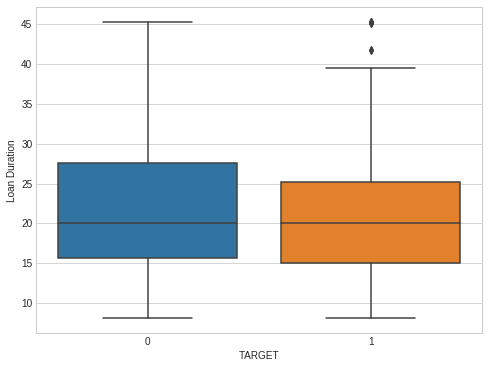

In [142]:
plt.figure(figsize=(8,6))
sns.boxplot(x='TARGET', y='Loan Duration', data=appl_data)

Potential defaulters are more likely to take the loans for a shorter duration. Which would mean that the AMT_CREDIT is lower and the annuity is high.

#### Credit Income Ratio
It can tell us about the financial health of the client

In [143]:
appl_data['Credit Income Ratio'] = round((appl_data['AMT_CREDIT']/appl_data['AMT_INCOME_TOTAL']), 2)

In [144]:
appl_data['Credit Income Ratio'].describe()

count    307511.000000
mean          3.957585
std           2.689684
min           0.000000
25%           2.020000
50%           3.270000
75%           5.160000
max          84.740000
Name: Credit Income Ratio, dtype: float64

We can see that the lowest ratio is that of 0, filtering it out from our dataframe to see why that is the case

In [145]:
(appl_data[appl_data['Credit Income Ratio']==0])[['AMT_CREDIT', 'AMT_INCOME_TOTAL', 'OCCUPATION_TYPE', 'NAME_INCOME_TYPE']]

,AMT_CREDIT,AMT_INCOME_TOTAL,OCCUPATION_TYPE,NAME_INCOME_TYPE
12840,562491.0,117000000.0,Laborers,Working


As we can see, the amt_credit is much lower than the income and therefore the ratio is 0. However, on closer inspection we see that the occupation is 'Labourer' and therefore this might be an error in the dataframe.

Checking the case where the ratio is **84.74**

In [146]:
(appl_data[appl_data['Credit Income Ratio']>80])[['AMT_CREDIT', 'AMT_INCOME_TOTAL', 'OCCUPATION_TYPE', 'NAME_INCOME_TYPE']]

,AMT_CREDIT,AMT_INCOME_TOTAL,OCCUPATION_TYPE,NAME_INCOME_TYPE
20727,2173500.0,25650.0,NaN,Pensioner


In [147]:
ratio_income_type = appl_data[['TARGET', 'Credit Income Ratio', 'NAME_INCOME_TYPE']]

In [148]:
ratio_income_type['NAME_INCOME_TYPE'].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

Since the number of some categories is miniscule, removing them from the analysis will be more apt.

In [149]:
ratio_income_type = ratio_income_type[~ratio_income_type['NAME_INCOME_TYPE'].isin(['Unemployed', 'Student',
                                                                                 'Businessman', 'Maternity leave'])]

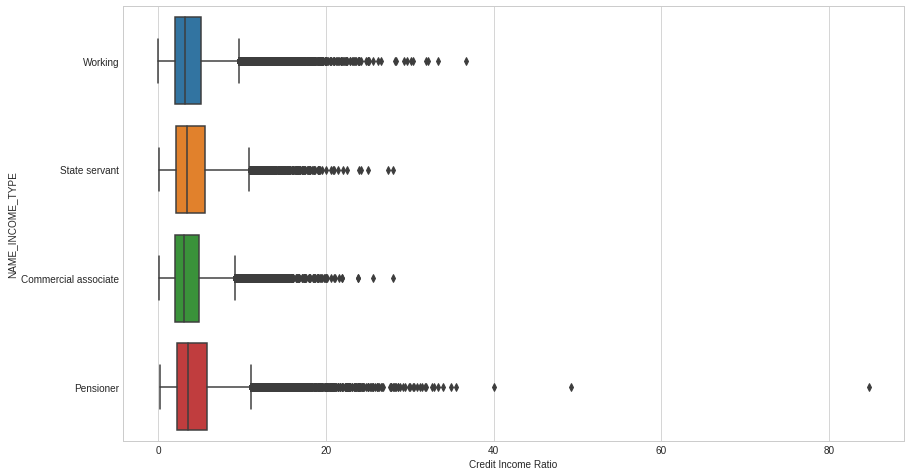

In [150]:
plt.figure(figsize=(14,8))
sns.boxplot(y='NAME_INCOME_TYPE', x='Credit Income Ratio', data=ratio_income_type)

The plot is a bit skewed because of the prescence of outliers in the 'Pensioner' category.<br>
Removing these outliers.

(0, 31)

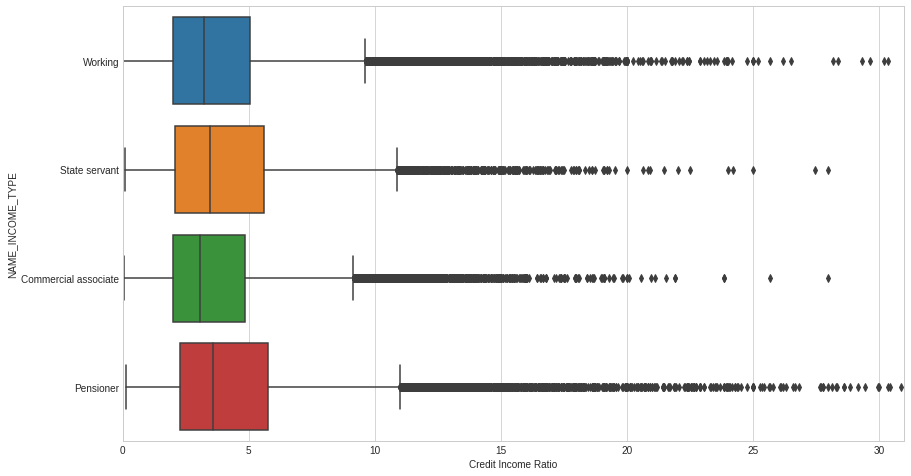

In [151]:
plt.figure(figsize=(14,8))
sns.boxplot(y='NAME_INCOME_TYPE', x='Credit Income Ratio', data=ratio_income_type)
plt.xlim(0, 31)

From this plot, it is quite clear that the 'Pensioners' and the 'State servants' have slighty higher median values for credit-income ratio. From our previous plot, we can see that the risk of default for both these categories was the least.

#### WEEKDAY_APPR_PROCESS_START:
The day on which the application was recieved.

In [152]:
appl_data['WEEKDAY_APPR_PROCESS_START'].value_counts()

TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

In [153]:
# Total Applicants:
days = appl_data['WEEKDAY_APPR_PROCESS_START'].value_counts()
days = pd.DataFrame({'Day':days.index, 'Count_total':days.values})

# Applicants with problems:
days_1 = appl_data['TARGET'].groupby(appl_data['WEEKDAY_APPR_PROCESS_START']).sum()
days_1 = pd.DataFrame({'Day':days_1.index, 'Count_default':days_1.values})

# Merging:
days = days.merge(days_1, how='inner', on='Day')

# Percentage:
days['percentage'] = round((days['Count_default']/days['Count_total'])*100, 2)
days

,Day,Count_total,Count_default,percentage
0,TUESDAY,53901,4501,8.35
1,WEDNESDAY,51934,4238,8.16
2,MONDAY,50714,3934,7.76
3,THURSDAY,50591,4098,8.10
4,FRIDAY,50338,4101,8.15
5,SATURDAY,33852,2670,7.89
6,SUNDAY,16181,1283,7.93


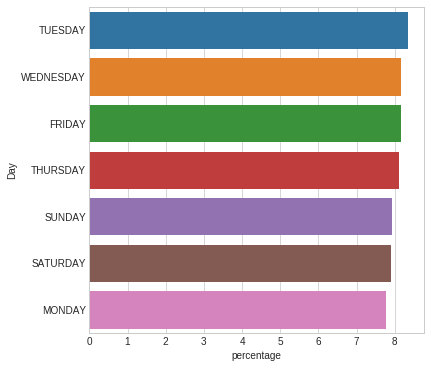

In [154]:
days = days.sort_values('percentage', ascending=False)
plt.figure(figsize=(6,6))
sns.barplot(x='percentage', y='Day', data=days)

The applications recieved on Saturday, Sunday and Monday have comparatively less likelihood of default. Applications which were recieved on Monday has the least likelihood of default.<br>
Interestingly, the risk of default increases by 1% on Tuesday when the highest applications from potential defaulters are recieved.

#### TOT_REQ_CREDIT_BUREAU:
Total number of requests made to the credit bureau about the client

In [155]:
appl_data['TOT_REQ_CREDIT_BUREAU'] = appl_data['AMT_REQ_CREDIT_BUREAU_QRT'] + appl_data['AMT_REQ_CREDIT_BUREAU_YEAR']+appl_data['AMT_REQ_CREDIT_BUREAU_WEEK']+appl_data['AMT_REQ_CREDIT_BUREAU_MON']+appl_data['AMT_REQ_CREDIT_BUREAU_DAY']+appl_data['AMT_REQ_CREDIT_BUREAU_HOUR']
appl_data['TOT_REQ_CREDIT_BUREAU'].describe()

count    265992.000000
mean          2.480608
std           2.288329
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max         262.000000
Name: TOT_REQ_CREDIT_BUREAU, dtype: float64

In [156]:
appl_data['TOT_REQ_CREDIT_BUREAU'].value_counts(normalize=True)*100

1.0      20.269031
2.0      19.383666
0.0      19.140049
3.0      14.804957
4.0      10.241285
5.0       6.484406
6.0       4.050874
7.0       2.416614
8.0       1.441397
9.0       0.854537
10.0      0.396628
11.0      0.192111
12.0      0.104890
13.0      0.061280
14.0      0.051881
15.0      0.031956
16.0      0.022557
17.0      0.015790
18.0      0.012030
19.0      0.008271
20.0      0.007143
21.0      0.003384
22.0      0.001504
23.0      0.001128
30.0      0.000752
28.0      0.000376
27.0      0.000376
262.0     0.000376
31.0      0.000376
24.0      0.000376
Name: TOT_REQ_CREDIT_BUREAU, dtype: float64

It can be seen that for about majority of the applicants, the total number of enquiries does not exceed 8.<br>
Therefore, filtering them out

In [157]:
enquiries = appl_data[['TARGET', 'TOT_REQ_CREDIT_BUREAU']]
enquiries = enquiries[enquiries['TOT_REQ_CREDIT_BUREAU'] <= 8]

In [158]:
# Total Applicants:
enq = enquiries['TOT_REQ_CREDIT_BUREAU'].value_counts()
enq = pd.DataFrame({'Number of enquiries':enq.index, 'Count_total':enq.values})

# Total applicants with problems:
enq_1 = enquiries['TARGET'].groupby(enquiries['TOT_REQ_CREDIT_BUREAU']).sum()
enq_1 = pd.DataFrame({'Number of enquiries':enq_1.index, 'Count_default':enq_1.values})

# Merging:
enq = enq.merge(enq_1, how='inner', on='Number of enquiries')

# Percentage:
enq['percentage'] = round((enq['Count_default']/enq['Count_total'])*100, 2)
enq

,Number of enquiries,Count_total,Count_default,percentage
0,1.0,53914,3997,7.41
1,2.0,51559,3973,7.71
2,0.0,50911,3755,7.38
3,3.0,39380,3036,7.71
4,4.0,27241,2160,7.93
5,5.0,17248,1445,8.38
6,6.0,10775,883,8.19
7,7.0,6428,578,8.99
8,8.0,3834,318,8.29


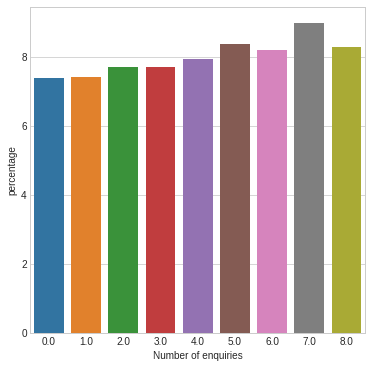

In [159]:
enq = enq.sort_values('percentage', ascending=False)

plt.figure(figsize=(6,6))
sns.barplot(x='Number of enquiries', y='percentage', data=enq)

The chances of an applicant defaulting increases with the number of enquiries made.

#### DAYS_ID_PUBLISH

In [160]:
appl_data['DAYS_ID_PUBLISH'].describe()

count    307511.000000
mean      -2994.202373
std        1509.450419
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [161]:
# Converting the days into months(divide by 30):
ID = appl_data[['TARGET', 'DAYS_ID_PUBLISH']]
ID['DAYS_ID_PUBLISH'] = round(ID['DAYS_ID_PUBLISH']/30, 2)
ID.head()

/home/savan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,TARGET,DAYS_ID_PUBLISH
0,1,-70.67
1,0,-9.70
2,0,-84.37
3,0,-81.23
4,0,-115.27


Let us see the distribution for the same

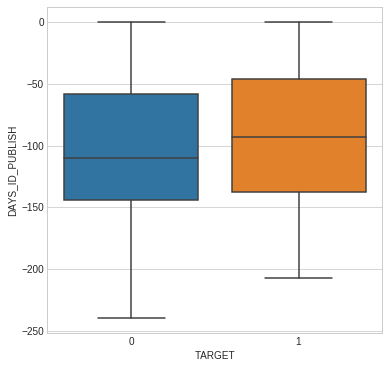

In [162]:
plt.figure(figsize=(6,6))
sns.boxplot(x='TARGET', y='DAYS_ID_PUBLISH', data=ID)

We can see that the potential defaulters tend to change their ID's closer to the application date.

#### DAYS_REGISTRATION

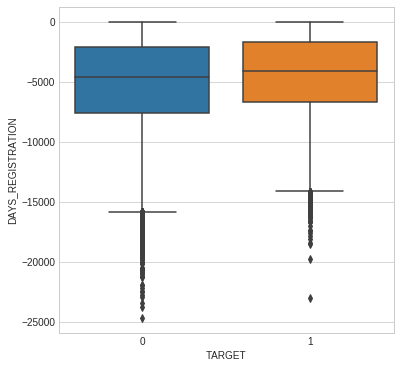

In [163]:
reg = appl_data[['TARGET', 'DAYS_REGISTRATION']]

plt.figure(figsize=(6,6))
sns.boxplot(x='TARGET', y='DAYS_REGISTRATION', data=reg)

Potential defaulters again change their registration closer to the application date.

#### REGION_POPULATION_RELATIVE
Normalized population of region where client lives (higher number means the client lives in more populated region)

In [164]:
appl_data['REGION_POPULATION_RELATIVE'].describe()

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

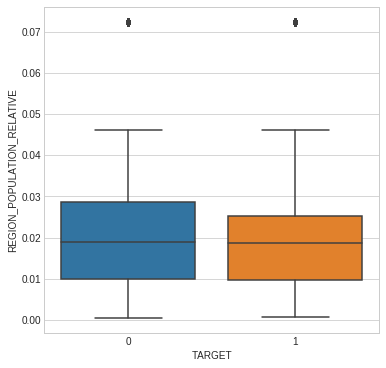

In [165]:
plt.figure(figsize=(6,6))
sns.boxplot(x='TARGET', y='REGION_POPULATION_RELATIVE', data=appl_data)

This is an interesting insight, majority of the potential defaulters in general tend to live within areas that are slightly less populated than their counterparts.

#### REGION_RATING_CLIENT

In [166]:
appl_data['REGION_RATING_CLIENT'].value_counts()

2    226984
3     48330
1     32197
Name: REGION_RATING_CLIENT, dtype: int64

In [167]:
# Total applicants:
region_rating = appl_data['REGION_RATING_CLIENT'].value_counts()
region_rating = pd.DataFrame({'Region Rating':region_rating.index, 'Count_total':region_rating.values})

# Applicants with problems:
region_rating_1 = appl_data['TARGET'].groupby(appl_data['REGION_RATING_CLIENT']).sum()
region_rating_1 = pd.DataFrame({'Region Rating':region_rating_1.index, 'Count_default':region_rating_1.values})

# Merging:
region_rating = region_rating.merge(region_rating_1, how='inner', on='Region Rating')

# Percentage:
region_rating['percentage'] = round((region_rating['Count_default']/region_rating['Count_total'])*100, 2)
region_rating

,Region Rating,Count_total,Count_default,percentage
0,2,226984,17907,7.89
1,3,48330,5366,11.10
2,1,32197,1552,4.82


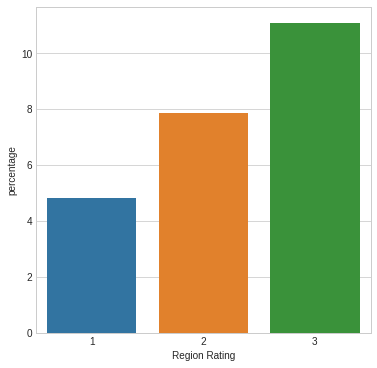

In [168]:
region_rating = region_rating.sort_values('percentage', ascending = False)

plt.figure(figsize = (6,6))
sns.barplot(x='Region Rating', y='percentage', data=region_rating)

There is a huge variance in the % of potential defaulters in the three regions, to be noticed that Region 3 has the greatest % of 11% which is followed by Region 2 with around 8% and Region 3 with 5%

#### REGION_RATING_CLIENT_W_CITY

In [169]:
# Total applicants:
region_rating = appl_data['REGION_RATING_CLIENT_W_CITY'].value_counts()
region_rating = pd.DataFrame({'City Rating':region_rating.index, 'Count_total':region_rating.values})

# Applicants with problems:
region_rating_1 = appl_data['TARGET'].groupby(appl_data['REGION_RATING_CLIENT_W_CITY']).sum()
region_rating_1 = pd.DataFrame({'City Rating':region_rating_1.index, 'Count_default':region_rating_1.values})

# Merging:
region_rating = region_rating.merge(region_rating_1, how='inner', on='City Rating')

# Percentage:
region_rating['percentage'] = round((region_rating['Count_default']/region_rating['Count_total'])*100, 2)
region_rating = region_rating.sort_values('percentage', ascending = False)
region_rating

,City Rating,Count_total,Count_default,percentage
1,3,43860,5001,11.40
0,2,229484,18170,7.92
2,1,34167,1654,4.84


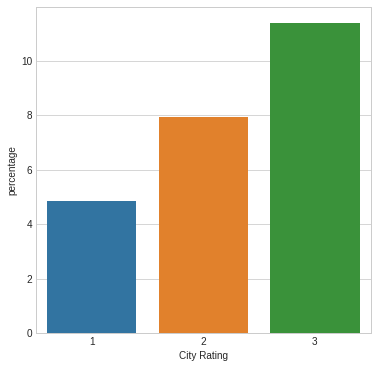

In [170]:
plt.figure(figsize = (6,6))
sns.barplot(x='City Rating', y='percentage', data=region_rating)

The cities follow the same suit as the region, even the % values being vary close.

## PREVIOUS_APPLICATION_DATA

In [171]:
prev_appl = pd.read_csv('previous_application.csv')
prev_appl.shape

(1670214, 37)

In [172]:
# Finding Missing values column_wise:
((prev_appl.isnull().sum(axis='rows')/prev_appl.shape[0]) * 100).sort_values(ascending = False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
RATE_DOWN_PAYMENT              53.636480
AMT_DOWN_PAYMENT               53.636480
NAME_TYPE_SUITE                49.119754
DAYS_TERMINATION               40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_FIRST_DRAWING             40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_LAST_DUE                  40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
AMT_APPLICATION                 0.000000
NAME_PAYMENT_TYPE               0.000000
NAME_CASH_LOAN_P

In [173]:
# Dropping the two columns with 99% missing values:
prev_appl.drop(['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY'], axis='columns', inplace = True)

In [174]:
# The other columns are important and hence cant be dropped, therefore we can drop the corresponding rows where the
# DOWN_PAYMENT columns are null:
prev_appl = prev_appl[~prev_appl['AMT_DOWN_PAYMENT'].isnull()]
prev_appl.shape

(774370, 35)

In [175]:
# Again finding Missing values column_wise:
((prev_appl.isnull().sum(axis='rows')/prev_appl.shape[0]) * 100).sort_values(ascending = False)

NAME_TYPE_SUITE                35.688753
NFLAG_INSURED_ON_APPROVAL      16.194067
DAYS_LAST_DUE                  16.194067
DAYS_LAST_DUE_1ST_VERSION      16.194067
DAYS_FIRST_DUE                 16.194067
DAYS_FIRST_DRAWING             16.194067
DAYS_TERMINATION               16.194067
AMT_ANNUITY                     4.311763
CNT_PAYMENT                     4.311247
WEEKDAY_APPR_PROCESS_START      0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
AMT_APPLICATION                 0.000000
AMT_GOODS_PRICE                 0.000000
AMT_DOWN_PAYMENT                0.000000
AMT_CREDIT                      0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_TYPE              0.000000
SK_ID_CURR                      0.000000
RATE_DOWN_PAYMENT               0.000000
CODE_REJECT_REASON              0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYP

We can still see that there are some columns with 35% and 16% missing values. 16% is admissible, however 35% missing values does not feel right

In [176]:
# Removing the rows where NAME_TYPE_SUITE is null:
prev_appl = prev_appl[~prev_appl['NAME_TYPE_SUITE'].isnull()]
prev_appl.shape

(498007, 35)

In [177]:
# Again finding Missing values column_wise:
((prev_appl.isnull().sum(axis='rows')/prev_appl.shape[0]) * 100).sort_values(ascending = False)

NFLAG_INSURED_ON_APPROVAL      13.548203
DAYS_LAST_DUE                  13.548203
DAYS_LAST_DUE_1ST_VERSION      13.548203
DAYS_FIRST_DUE                 13.548203
DAYS_FIRST_DRAWING             13.548203
DAYS_TERMINATION               13.548203
CNT_PAYMENT                     1.183718
AMT_ANNUITY                     1.183718
AMT_GOODS_PRICE                 0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_APPLICATION                 0.000000
AMT_DOWN_PAYMENT                0.000000
AMT_CREDIT                      0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_TYPE              0.000000
SK_ID_CURR                      0.000000
RATE_DOWN_PAYMENT               0.000000
CODE_REJECT_REASON              0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
NAME_TYPE_SUITE 

Now the dataset is perfectly clean and we can move forward with this

Analyzing the different types of status of the application.

In [178]:
prev_appl['NAME_CONTRACT_STATUS'].value_counts()

Approved        437998
Refused          56455
Unused offer      3366
Canceled           188
Name: NAME_CONTRACT_STATUS, dtype: int64

We can see that there are 4 categories out of which 'Unused offer' and 'Canceled' have very less values and hence any analysis done on them might give exaggerated percentage values and therefore it would be prudent to create a new column containing only two values 1 and 0 for the loan being passed or not.

In [179]:
status_dict = {'Approved':1, 'Refused':0, 'Unused offer':0, 'Canceled':0}
prev_appl['LOAN_STATUS'] = prev_appl['NAME_CONTRACT_STATUS'].map(status_dict)

In [180]:
prev_appl['LOAN_STATUS'].value_counts()

1    437998
0     60009
Name: LOAN_STATUS, dtype: int64

#### AMT_APPLICATION

In [181]:
prev_appl['AMT_APPLICATION'].describe()

count    4.980070e+05
mean     9.878866e+04
std      9.426755e+04
min      3.456000e+03
25%      4.041828e+04
50%      7.466400e+04
75%      1.259820e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64

In [182]:
amt_appl = prev_appl[['LOAN_STATUS', 'AMT_APPLICATION']]
amt_appl = amt_appl[~amt_appl['AMT_APPLICATION'].isnull()]

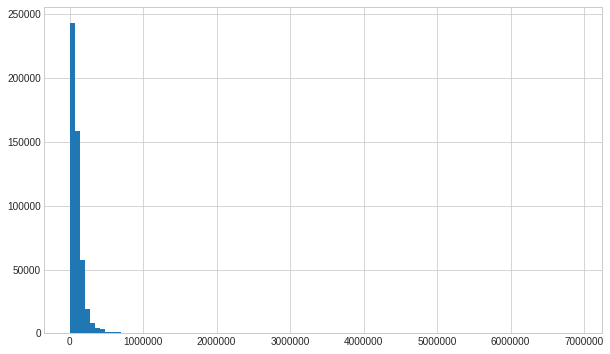

In [183]:
# Visualizing the distribution:

plt.figure(figsize=(10,6))
plt.hist(amt_appl['AMT_APPLICATION'], bins=100)
plt.show()

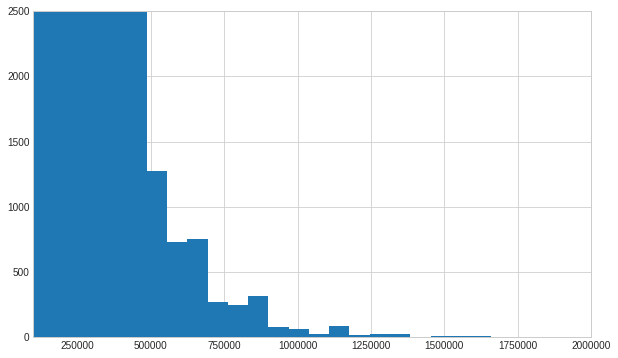

In [184]:
# Zooming in to get a correct idea about outliers:

plt.figure(figsize=(10,6))
plt.hist(amt_appl['AMT_APPLICATION'], bins=100)
plt.ylim(0,2500)
plt.xlim(100000, 2000000)
plt.show()

From the above plot, we can decide to group the new categorical variable into slots of 250000 rupees each.

In [185]:
amt_appl_list = []

for i in amt_appl['AMT_APPLICATION']:
    if i>=0 and i<250000:
        amt_appl_list.append('0-2.5lakh')
    elif i>=250000 and i<500000:
        amt_appl_list.append('2.5-5lakh')
    elif i>=500000 and i<750000:
        amt_appl_list.append('5-7.5lakh')
    elif i>=750000 and i<1000000:
        amt_appl_list.append('7.5-10lakh')
    else:
        amt_appl_list.append('10lakh+')
        
amt_appl['Loan Range'] = amt_appl_list
amt_appl['Loan Range'].value_counts()

0-2.5lakh     472120
2.5-5lakh      22296
5-7.5lakh       2596
7.5-10lakh       726
10lakh+          269
Name: Loan Range, dtype: int64

In [186]:
# Total Applicants:
amt_appl_tot = amt_appl['Loan Range'].value_counts()
amt_appl_tot = pd.DataFrame({'Loan Range':amt_appl_tot.index, 'Count_total':amt_appl_tot.values})

# Approved loans:
amt_appl_appr = amt_appl['LOAN_STATUS'].groupby(amt_appl['Loan Range']).sum()
amt_appl_appr = pd.DataFrame({'Loan Range':amt_appl_appr.index, 'Count_approved':amt_appl_appr.values})

# Merging:
amt_appl_tot = amt_appl_tot.merge(amt_appl_appr, how='inner', on='Loan Range')
# Percentage:
amt_appl_tot['perctage_approved'] = round((amt_appl_tot['Count_approved']/amt_appl_tot['Count_total'])*100, 2)
amt_appl_tot

,Loan Range,Count_total,Count_approved,perctage_approved
0,0-2.5lakh,472120,418235,88.59
1,2.5-5lakh,22296,17348,77.81
2,5-7.5lakh,2596,1898,73.11
3,7.5-10lakh,726,436,60.06
4,10lakh+,269,81,30.11


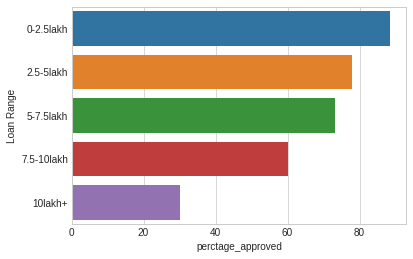

In [187]:
# Plotting:
plt.figure(figsize=(6,4))
sns.barplot(x='perctage_approved', y='Loan Range', data=amt_appl_tot)

we can see that the approval rating of the loan increases drastically as the amount increases with about 89% for loans upto 2.5 lakhs to 30% for loans increasing 10 lakh.

#### WEEKDAY_APPR_PROCESS_START

In [188]:
# Total people who applied:
day = prev_appl['WEEKDAY_APPR_PROCESS_START'].value_counts()
day = pd.DataFrame({'Day':day.index, 'Count_total':day.values})

# People whose application was approved:
day_1 = prev_appl['LOAN_STATUS'].groupby(prev_appl['WEEKDAY_APPR_PROCESS_START']).sum()
day_1 = pd.DataFrame({'Day':day_1.index, 'Count_approved':day_1.values})

# Merging:
day = day.merge(day_1, how='inner', on='Day')

# Percentage:
day['percentage'] = round((day['Count_approved']/day['Count_total'])*100, 2)

# Sorting:
day = day.sort_values('percentage', ascending = False)
day['percentage_refused'] = 100 - day['percentage']
day = day.sort_values('percentage_refused', ascending = False)
day

,Day,Count_total,Count_approved,percentage,percentage_refused
3,THURSDAY,67237,58589,87.14,12.86
5,TUESDAY,66372,57858,87.17,12.83
6,MONDAY,65904,57450,87.17,12.83
4,WEDNESDAY,67060,58487,87.22,12.78
2,FRIDAY,69963,61170,87.43,12.57
0,SATURDAY,88066,78640,89.30,10.70
1,SUNDAY,73405,65804,89.65,10.35


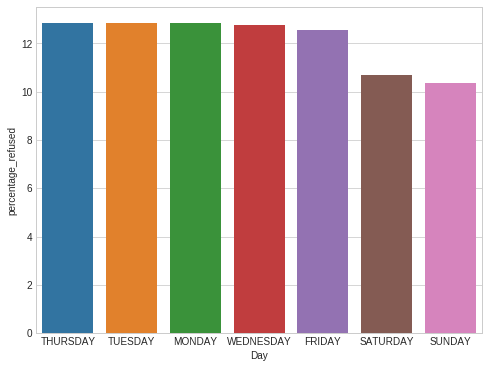

In [189]:
plt.figure(figsize=(8,6))
sns.barplot(y='percentage_refused', x='Day', data=day)

We can see that there is a 2% drop in the loan refusals for the loans which were applied for on Weekends. Which means that people who apply in weekends have more chances of getting their loan appoved by the bank. <br>
The reason for it might be that the people who apply for loans during the weekend are full time workers with good financial health and are serious about their application, hence the higher approval rating. 

#### NAME_CASH_LOAN_PURPOSE

In [190]:
prev_appl['NAME_CASH_LOAN_PURPOSE'].value_counts()

XAP                                 464681
XNA                                  26084
Other                                 2525
Repairs                               1852
Everyday expenses                      926
Education                              536
Medicine                               479
Purchase of electronic equipment       278
Buying a used car                      272
Journey                                262
Buying a new car                        53
Payments on other loans                 50
Money for a third person                 7
Hobby                                    2
Name: NAME_CASH_LOAN_PURPOSE, dtype: int64

In [191]:
# Total number of applicants:
purpose = prev_appl['NAME_CASH_LOAN_PURPOSE'].value_counts()
purpose = pd.DataFrame({'Purpose':purpose.index, 'Count_total':purpose.values})

# Approved applications:
purpose_1 = prev_appl['LOAN_STATUS'].groupby(prev_appl['NAME_CASH_LOAN_PURPOSE']).sum()
purpose_1 = pd.DataFrame({'Purpose':purpose_1.index, 'Count_approved':purpose_1.values})

# Merging:
purpose = purpose.merge(purpose_1, how='inner', on='Purpose')

# Percentage approval:
purpose['percentage_approved'] = round((purpose['Count_approved']/purpose['Count_total'])*100, 2)

# Sorting:
purpose = purpose.sort_values('percentage_approved', ascending=False)
purpose

,Purpose,Count_total,Count_approved,percentage_approved
0,XAP,464681,413959,89.08
1,XNA,26084,20284,77.76
7,Purchase of electronic equipment,278,166,59.71
6,Medicine,479,283,59.08
5,Education,536,306,57.09
9,Journey,262,143,54.58
4,Everyday expenses,926,496,53.56
3,Repairs,1852,955,51.57
2,Other,2525,1266,50.14
12,Money for a third person,7,3,42.86


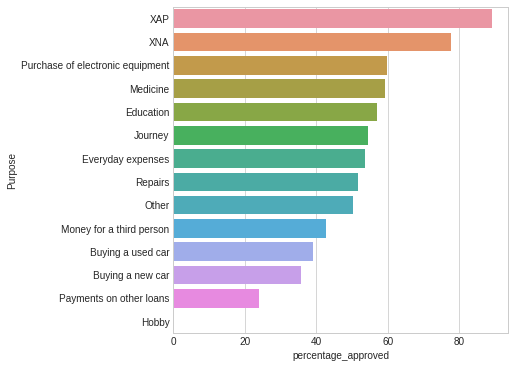

In [192]:
# Plotting:
plt.figure(figsize=(6,6))
sns.barplot(x='percentage_approved', y='Purpose', data=purpose)

We can see that the categories XAP(no purpose) and XNA(not available) have the highest number of approvals.<br>
Interestingly, the third highest category wrt approved loans in 'Purchase of electric equipments'. This can be understood as the bank lending money for the purchase of household commodities to the working class.<br>
Medicine, Education and JOurney are other categories where the loan approval rate is above 50%.<br>
It can be seen that the bank is unwilling to lend 'Car loans' to people as the approval rate is just 35%

#### NAME_PAYMENT_TYPE:

In [193]:
prev_appl['NAME_PAYMENT_TYPE'].value_counts()

Cash through the bank                        441053
XNA                                           51749
Non-cash from your account                     4628
Cashless from the account of the employer       577
Name: NAME_PAYMENT_TYPE, dtype: int64

In [194]:
# Total applicants:
pay_type = prev_appl['NAME_PAYMENT_TYPE'].value_counts()
pay_type = pd.DataFrame({'Payment Type':pay_type.index, 'Count_total':pay_type.values})

# Approved applications:
pay_type_1 = prev_appl['LOAN_STATUS'].groupby(prev_appl['NAME_PAYMENT_TYPE']).sum()
pay_type_1 = pd.DataFrame({'Payment Type':pay_type_1.index, 'Count_approved':pay_type_1.values})

# Merging:
pay_type = pay_type.merge(pay_type_1, how='inner', on='Payment Type')
pay_type['percentage_approved'] = round((pay_type['Count_approved']/pay_type['Count_total'])*100, 2)
pay_type = pay_type.sort_values('percentage_approved', ascending = False)
pay_type

,Payment Type,Count_total,Count_approved,percentage_approved
2,Non-cash from your account,4628,4151,89.69
1,XNA,51749,46070,89.03
0,Cash through the bank,441053,387297,87.81
3,Cashless from the account of the employer,577,480,83.19


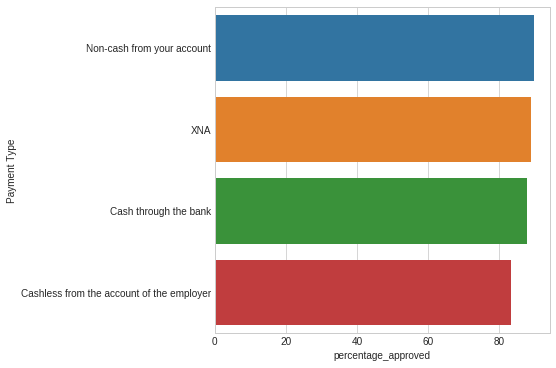

In [195]:
# Plotting:
plt.figure(figsize=(6,6))
sns.barplot(x='percentage_approved', y='Payment Type', data=pay_type)

The bank prefers to deduct the amount directly from the customer's account since the approval rating for this is about 90%<br>
Followed by it is the deposit for cash in the bank, which although inconvinient also has ana approval rating of 87%.<br>
The bank however prefer the involvement of the applicants employer the least since it has the lowest approval rating of 83%

#### CODE_REJECT_REASON:

In [196]:
prev_appl['CODE_REJECT_REASON'].value_counts(normalize=True)*100

XAP       87.987317
LIMIT      4.068417
SCO        3.546938
HC         3.451960
CLIENT     0.675894
XNA        0.130922
VERIF      0.099597
SCOFR      0.037750
SYSTEM     0.001205
Name: CODE_REJECT_REASON, dtype: float64

From the above table, it can be seen that around 88% of the loans were approved. <br>
Of the remaining 12%, the biggest chunk was that of **'LIMIT' - 4%, 'SCO' - 3.5% and 'HC' - 3.5%**

#### NAME_TYPE_SUITE

In [197]:
prev_appl['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      230095
Family             165158
Spouse, partner     52069
Children            26346
Other_B             14760
Other_A              7774
Group of people      1805
Name: NAME_TYPE_SUITE, dtype: int64

In [198]:
# Total applicants:
accomp = prev_appl['NAME_TYPE_SUITE'].value_counts()
accomp = pd.DataFrame({'Accompanied by':accomp.index, 'Count_total':accomp.values})

# Approved:
accomp_1 = prev_appl['LOAN_STATUS'].groupby(prev_appl['NAME_TYPE_SUITE']).sum()
accomp_1 = pd.DataFrame({'Accompanied by':accomp_1.index, 'Count_approved':accomp_1.values})

# Merging:
accomp = accomp.merge(accomp_1, how='inner', on='Accompanied by')
accomp['percentage_approved'] = round((accomp['Count_approved']/accomp['Count_total'])*100, 2)
accomp = accomp.sort_values('percentage_approved', ascending=False)
accomp

,Accompanied by,Count_total,Count_approved,percentage_approved
1,Family,165158,147492,89.30
2,"Spouse, partner",52069,46490,89.29
3,Children,26346,23334,88.57
0,Unaccompanied,230095,199844,86.85
4,Other_B,14760,12699,86.04
5,Other_A,7774,6662,85.70
6,Group of people,1805,1477,81.83


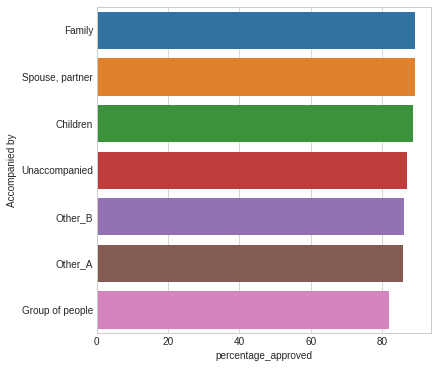

In [199]:
# Plotting:
plt.figure(figsize=(6,6))
sns.barplot(y='Accompanied by', x='percentage_approved', data=accomp)

Applicants who are accompanied by their families, spouse and kids have higher chances of approval which is around 90%.<br>
It falls steeply down to 81% for people who arrive with a group of people who are not related to the applicant. 

#### NAME_CLIENT_TYPE

In [200]:
prev_appl['NAME_CLIENT_TYPE'].value_counts()

Repeater     277338
New          181740
Refreshed     38602
XNA             327
Name: NAME_CLIENT_TYPE, dtype: int64

In [201]:
# Total applicants:
accomp = prev_appl['NAME_CLIENT_TYPE'].value_counts()
accomp = pd.DataFrame({'Client type':accomp.index, 'Count_total':accomp.values})

# Approved:
accomp_1 = prev_appl['LOAN_STATUS'].groupby(prev_appl['NAME_CLIENT_TYPE']).sum()
accomp_1 = pd.DataFrame({'Client type':accomp_1.index, 'Count_approved':accomp_1.values})

# Merging:
accomp = accomp.merge(accomp_1, how='inner', on='Client type')
accomp['percentage_approved'] = round((accomp['Count_approved']/accomp['Count_total'])*100, 2)
accomp = accomp.sort_values('percentage_approved', ascending=False)
accomp

,Client type,Count_total,Count_approved,percentage_approved
1,New,181740,173942,95.71
2,Refreshed,38602,35634,92.31
3,XNA,327,289,88.38
0,Repeater,277338,228133,82.26


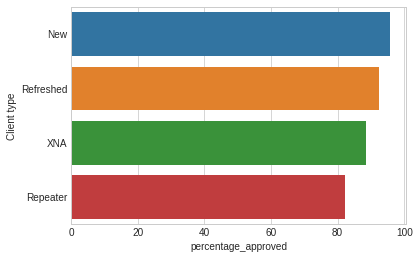

In [202]:
# Plotting:
plt.figure(figsize=(6,4))
sns.barplot(y='Client type', x='percentage_approved', data=accomp)

Applicants who are new to the bank enjoy the highest approval rating of about 96%. These are followed by the applicants who are categorised as 'Refreshed' with approval rating of about 92%.<br>
For 'Repeater' applicants, the approval rating falls sharply to just 82%.

#### NAME_GOODS_CATEGORY

In [203]:
prev_appl['NAME_GOODS_CATEGORY'].value_counts()

Mobile                      106731
Consumer Electronics         94085
Audio/Video                  78681
Computers                    73663
XNA                          40338
Furniture                    35619
Photo / Cinema Equipment     16440
Clothing and Accessories     15463
Construction Materials       14806
Auto Accessories              4330
Jewelry                       3158
Homewares                     2638
Vehicles                      1980
Sport and Leisure             1845
Office Appliances             1838
Other                         1636
Gardening                     1524
Medical Supplies              1446
Tourism                        738
Medicine                       497
Direct Sales                   283
Fitness                         94
Weapon                          54
Education                       48
Additional Service              48
Insurance                       23
House Construction               1
Name: NAME_GOODS_CATEGORY, dtype: int64

In [204]:
# Total applicants:
accomp = prev_appl['NAME_GOODS_CATEGORY'].value_counts()
accomp = pd.DataFrame({'Goods type':accomp.index, 'Count_total':accomp.values})

# Approved:
accomp_1 = prev_appl['LOAN_STATUS'].groupby(prev_appl['NAME_GOODS_CATEGORY']).sum()
accomp_1 = pd.DataFrame({'Goods type':accomp_1.index, 'Count_approved':accomp_1.values})

# Merging:
accomp = accomp.merge(accomp_1, how='inner', on='Goods type')
accomp['percentage_approved'] = round((accomp['Count_approved']/accomp['Count_total'])*100, 2)
accomp = accomp.sort_values('percentage_approved', ascending=False)
accomp

,Goods type,Count_total,Count_approved,percentage_approved
21,Fitness,94,94,100.00
15,Other,1636,1542,94.25
16,Gardening,1524,1413,92.72
22,Weapon,54,50,92.59
19,Medicine,497,458,92.15
1,Consumer Electronics,94085,86649,92.10
17,Medical Supplies,1446,1331,92.05
5,Furniture,35619,32614,91.56
13,Sport and Leisure,1845,1689,91.54
10,Jewelry,3158,2887,91.42


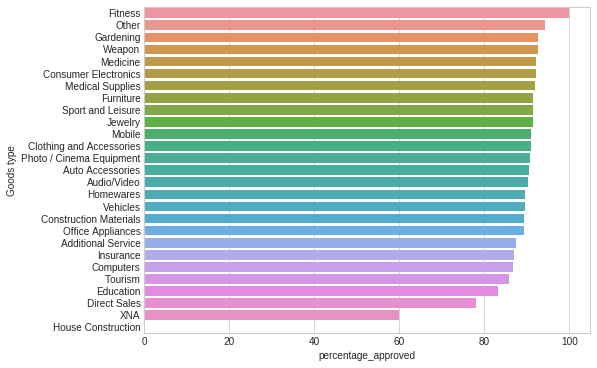

In [205]:
# Plotting:
plt.figure(figsize=(8,6))
sns.barplot(y='Goods type', x='percentage_approved', data=accomp)

#### NAME_PORTFOLIO

In [206]:
prev_appl['NAME_PORTFOLIO'].value_counts()

POS      458778
Cash      33326
XNA        5895
Cards         8
Name: NAME_PORTFOLIO, dtype: int64

In [207]:
# Total applicants:
accomp = prev_appl['NAME_PORTFOLIO'].value_counts()
accomp = pd.DataFrame({'Portfolio type':accomp.index, 'Count_total':accomp.values})

# Approved:
accomp_1 = prev_appl['LOAN_STATUS'].groupby(prev_appl['NAME_PORTFOLIO']).sum()
accomp_1 = pd.DataFrame({'Portfolio type':accomp_1.index, 'Count_approved':accomp_1.values})

# Merging:
accomp = accomp.merge(accomp_1, how='inner', on='Portfolio type')
accomp['percentage_approved'] = round((accomp['Count_approved']/accomp['Count_total'])*100, 2)
accomp = accomp.sort_values('percentage_approved', ascending=False)
accomp

,Portfolio type,Count_total,Count_approved,percentage_approved
3,Cards,8,8,100.00
0,POS,458778,413951,90.23
1,Cash,33326,24039,72.13
2,XNA,5895,0,0.00


#### NAME_PRODUCT_TYPE

In [208]:
# Total applicants:
accomp = prev_appl['NAME_PRODUCT_TYPE'].value_counts()
accomp = pd.DataFrame({'Product type':accomp.index, 'Count_total':accomp.values})

# Approved:
accomp_1 = prev_appl['LOAN_STATUS'].groupby(prev_appl['NAME_PRODUCT_TYPE']).sum()
accomp_1 = pd.DataFrame({'Product type':accomp_1.index, 'Count_approved':accomp_1.values})

# Merging:
accomp = accomp.merge(accomp_1, how='inner', on='Product type')
accomp['percentage_approved'] = round((accomp['Count_approved']/accomp['Count_total'])*100, 2)
accomp = accomp.sort_values('percentage_approved', ascending=False)
accomp

,Product type,Count_total,Count_approved,percentage_approved
0,XNA,464673,413951,89.08
1,x-sell,21577,17421,80.74
2,walk-in,11757,6626,56.36


#### CHANNEL_TYPE

In [209]:
# Total applicants:
accomp = prev_appl['CHANNEL_TYPE'].value_counts()
accomp = pd.DataFrame({'Channel type':accomp.index, 'Count_total':accomp.values})

# Approved:
accomp_1 = prev_appl['LOAN_STATUS'].groupby(prev_appl['CHANNEL_TYPE']).sum()
accomp_1 = pd.DataFrame({'Channel type':accomp_1.index, 'Count_approved':accomp_1.values})

# Merging:
accomp = accomp.merge(accomp_1, how='inner', on='Channel type')
accomp['percentage_approved'] = round((accomp['Count_approved']/accomp['Count_total'])*100, 2)
accomp = accomp.sort_values('percentage_approved', ascending=False)
accomp

,Channel type,Count_total,Count_approved,percentage_approved
5,AP+ (Cash loan),14,14,100.00
4,Contact center,27,25,92.59
2,Regional / Local,71737,65039,90.66
1,Stone,138784,124865,89.97
0,Country-wide,254592,224399,88.14
3,Credit and cash offices,32853,23656,72.01


Can write insights about from which channel the client was acquired. As in what mode was used to get to the client and convince him to take the loan from the bank. What channels have been the most successful, etc.

#### NAME_YIELD_GROUP

In [210]:
# Total applicants:
accomp = prev_appl['NAME_YIELD_GROUP'].value_counts()
accomp = pd.DataFrame({'Interest Type':accomp.index, 'Count_total':accomp.values})

# Approved:
accomp_1 = prev_appl['LOAN_STATUS'].groupby(prev_appl['NAME_YIELD_GROUP']).sum()
accomp_1 = pd.DataFrame({'Interest Type':accomp_1.index, 'Count_approved':accomp_1.values})

# Merging:
accomp = accomp.merge(accomp_1, how='inner', on='Interest Type')
accomp['percentage_approved'] = round((accomp['Count_approved']/accomp['Count_total'])*100, 2)
accomp = accomp.sort_values('percentage_approved', ascending=False)
accomp

,Interest Type,Count_total,Count_approved,percentage_approved
1,middle,142442,128247,90.03
2,low_normal,119877,107315,89.52
3,low_action,49433,43617,88.23
0,high,180352,158811,88.06
4,XNA,5903,8,0.14


#### PRODUCT_COMBINATION

In [211]:
prev_appl['PRODUCT_COMBINATION'].value_counts()

POS household with interest       207297
POS mobile with interest          102629
POS household without interest     66358
POS industry with interest         62420
Cash Street: high                  17142
POS other with interest            12251
Cash X-Sell: high                   8100
POS industry without interest       7749
POS mobile without interest         5078
Cash Street: middle                 4982
Cash X-Sell: middle                 1941
POS others without interest          891
Cash Street: low                     784
Cash X-Sell: low                     377
Card Street                            8
Name: PRODUCT_COMBINATION, dtype: int64

In [212]:
# Total applicants:
accomp = prev_appl['PRODUCT_COMBINATION'].value_counts()
accomp = pd.DataFrame({'Product combination':accomp.index, 'Count_total':accomp.values})

# Approved:
accomp_1 = prev_appl['LOAN_STATUS'].groupby(prev_appl['PRODUCT_COMBINATION']).sum()
accomp_1 = pd.DataFrame({'Product combination':accomp_1.index, 'Count_approved':accomp_1.values})

# Merging:
accomp = accomp.merge(accomp_1, how='inner', on='Product combination')
accomp['percentage_approved'] = round((accomp['Count_approved']/accomp['Count_total'])*100, 2)
accomp = accomp.sort_values('percentage_approved', ascending=False)
accomp

,Product combination,Count_total,Count_approved,percentage_approved
14,Card Street,8,8,100.00
8,POS mobile without interest,5078,4748,93.50
7,POS industry without interest,7749,7036,90.80
5,POS other with interest,12251,11103,90.63
3,POS industry with interest,62420,56494,90.51
13,Cash X-Sell: low,377,338,89.66
10,Cash X-Sell: middle,1941,1737,89.49
1,POS mobile with interest,102629,91353,89.01
0,POS household with interest,207297,184351,88.93
2,POS household without interest,66358,58087,87.54


#### DAYS_TERMINATION:
Was the previous application terminated before client applied for a new one?<br>
If the value is -ive then yes, these are the number of days that the application was terminated, else the application will go on until the specified number of positive value.

In [213]:
prev_appl['DAYS_TERMINATION'].describe()

count    430536.000000
mean      35741.535247
std      110473.337616
min       -2874.000000
25%       -1836.000000
50%       -1127.500000
75%        -521.000000
max      365243.000000
Name: DAYS_TERMINATION, dtype: float64

In [214]:
# Differentiating the number of clients whose previous application has terminated before applying for the new one:
prev_appl_completed = prev_appl[prev_appl['DAYS_TERMINATION']>=0]

# Clients whose previous application is ongoing:
prev_appl_ongoing = prev_appl[prev_appl['DAYS_TERMINATION']<0]

In [215]:
print(prev_appl_completed.shape)
print(prev_appl_ongoing.shape)

(43504, 36)
(387032, 36)


#### Making a new column called "PREV_APPL_STATUS" which will be 1 for ongoing and 0 for terminated
But before that, we must understand that the column 'DAYS_TERMINATION' will only be avaiable for applications that were approved.<br>
Therefore, filtering the dataset to only include 'Approved' applications so that futher analysis can be done.

In [216]:
# Removing the rows where DAYS_TERMINATION is null:
prev_appl_days_term = prev_appl[~prev_appl['DAYS_TERMINATION'].isnull()]
prev_appl_days_term.shape

(430536, 36)

In [217]:
# First we need to change the datatype to int and before that we need to round the metric to the nearest 10th value:
prev_appl_days_term['DAYS_TERMINATION'] = round(prev_appl_days_term['DAYS_TERMINATION'], 0)
prev_appl_days_term['DAYS_TERMINATION'] = prev_appl_days_term['DAYS_TERMINATION'].astype(int)

/home/savan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/savan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [218]:
days_list = []
for i in prev_appl_days_term['DAYS_TERMINATION']:
    if i>=0:
        days_list.append('Active')
    else:
        days_list.append('Terminated')

In [219]:
prev_appl_days_term['PREV_APPL_STATUS'] = days_list

/home/savan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [220]:
prev_appl_days_term['PREV_APPL_STATUS'].value_counts(normalize=True)*100

Terminated    89.895386
Active        10.104614
Name: PREV_APPL_STATUS, dtype: float64

We can see that only 10% of the applicants have have the status of their previous application as 'Active'.

## MERGING THE TWO DATASETS:

Defining the columns to be selected in the merged dataframe:

In [221]:
cols_appl_final = ['OCCUPATION_TYPE',
'EXT_SOURCE_3',
'TOT_REQ_CREDIT_BUREAU',
'NAME_TYPE_SUITE',
'EXT_SOURCE_2',
'AMT_GOODS_PRICE',
'AMT_ANNUITY',
'CNT_FAM_MEMBERS',
'DAYS_LAST_PHONE_CHANGE',
'AMT_CREDIT',
'FLAG_OWN_CAR',
'FLAG_EMAIL',
'TARGET',
'FLAG_PHONE',
'FLAG_CONT_MOBILE',
'FLAG_WORK_PHONE',
'FLAG_EMP_PHONE',
'FLAG_MOBIL',
'NAME_CONTRACT_TYPE',
'CODE_GENDER',
'FLAG_OWN_REALTY',
'AMT_INCOME_TOTAL',
'DAYS_ID_PUBLISH',
'DAYS_REGISTRATION',
'DAYS_EMPLOYED',
'DAYS_BIRTH',
'REGION_POPULATION_RELATIVE',
'REGION_RATING_CLIENT',
'NAME_FAMILY_STATUS',
'NAME_EDUCATION_TYPE',
'NAME_INCOME_TYPE',
'CNT_CHILDREN',
'NAME_HOUSING_TYPE',
'REGION_RATING_CLIENT_W_CITY',
'WEEKDAY_APPR_PROCESS_START',
'FLAG_DOCUMENT_2',
'FLAG_DOCUMENT_3',
'FLAG_DOCUMENT_4',
'FLAG_DOCUMENT_5',
'FLAG_DOCUMENT_6',
'FLAG_DOCUMENT_7',
'FLAG_DOCUMENT_8',
'FLAG_DOCUMENT_9',
'FLAG_DOCUMENT_10',
'FLAG_DOCUMENT_11',
'FLAG_DOCUMENT_12',
'FLAG_DOCUMENT_13',
'FLAG_DOCUMENT_14',
'FLAG_DOCUMENT_15',
'FLAG_DOCUMENT_16',
'FLAG_DOCUMENT_17',
'FLAG_DOCUMENT_18',
'FLAG_DOCUMENT_19',
'FLAG_DOCUMENT_20',
'FLAG_DOCUMENT_21',
'ORGANIZATION_TYPE',
'LIVE_CITY_NOT_WORK_CITY',
'REG_CITY_NOT_WORK_CITY',
'REG_CITY_NOT_LIVE_CITY',
'LIVE_REGION_NOT_WORK_REGION',
'REG_REGION_NOT_WORK_REGION',
'SK_ID_CURR',
'Loan Duration',
'Credit Income Ratio',
'Applicant Age',
'Applicant Age in Decades',
'Years worked',
'Years worked in decades'
]

cols_prev_final = ['SK_ID_PREV',
'SK_ID_CURR',
'NAME_CONTRACT_TYPE',
'AMT_ANNUITY',
'AMT_APPLICATION',
'AMT_CREDIT',
'AMT_DOWN_PAYMENT',
'AMT_GOODS_PRICE',
'WEEKDAY_APPR_PROCESS_START',
'RATE_DOWN_PAYMENT',
'NAME_CASH_LOAN_PURPOSE',
'NAME_CONTRACT_STATUS',
'NAME_PAYMENT_TYPE',
'CODE_REJECT_REASON',
'NAME_TYPE_SUITE',
'NAME_CLIENT_TYPE',
'NAME_GOODS_CATEGORY',
'NAME_PORTFOLIO',
'NAME_PRODUCT_TYPE',
'CHANNEL_TYPE',
'NAME_YIELD_GROUP',
'PRODUCT_COMBINATION',
'DAYS_TERMINATION',
'NFLAG_INSURED_ON_APPROVAL',
'LOAN_STATUS'
]

In [222]:
appl_data_final = appl_data[cols_appl_final]
print(appl_data_final.shape)

prev_appl_final = prev_appl[cols_prev_final]
print(prev_appl_final.shape)

(307511, 68)
(498007, 25)


Before merging the dataframes, the columns in each must be renamed in order to avoid confusion

In [223]:
appl_data_final.name = 'a'
prev_appl_final.name = 'p'

for i in [appl_data_final, prev_appl_final]:
    i.columns = i.columns.map(lambda x : i.name + '_' + str(x))

Now that the column names have been changed, we can proceed with merging.<br>
Since SK_ID_CURR is the primary key (unique) for appl_data_final dataframe and the same is not the case for prev_appl_final dataframe, therefore in order to get all the records we must go with LEFT JOIN.

In [224]:
applications = appl_data_final.merge(prev_appl_final, how='left',
                                    left_on='a_SK_ID_CURR', right_on='p_SK_ID_CURR')

applications.shape

(521249, 93)

#### LOAN_STATUS grouped by OCCUPATION_TYPE and TARGET grouped by OCCUPATION_TYPE

In [225]:
occ_typ_lstat = applications['a_OCCUPATION_TYPE'].value_counts()
occ_typ_lstat = pd.DataFrame({'Occupation':occ_typ_lstat.index, 'Count_total':occ_typ_lstat.values})

# Approved applications:
occ_typ_lstat1 = applications['p_LOAN_STATUS'].groupby(applications['a_OCCUPATION_TYPE']).sum()
occ_typ_lstat1 = pd.DataFrame({'Occupation':occ_typ_lstat1.index, 'Count_approved':occ_typ_lstat1.values})

# Merging:
occ_typ_lstat = occ_typ_lstat.merge(occ_typ_lstat1, how='inner', on='Occupation')
occ_typ_lstat['percentage_approved'] = round((occ_typ_lstat['Count_approved']/occ_typ_lstat['Count_total'])*100, 2)
occ_typ_lstat = occ_typ_lstat.sort_values('Occupation', ascending = True)
occ_typ_lstat

,Occupation,Count_total,Count_approved,percentage_approved
6,Accountants,16458,11840.0,71.94
10,Cleaning staff,8090,5913.0,73.09
9,Cooking staff,10387,7657.0,73.72
2,Core staff,46386,33167.0,71.50
4,Drivers,32166,22963.0,71.39
16,HR staff,875,590.0,67.43
5,High skill tech staff,19007,13576.0,71.43
17,IT staff,786,509.0,64.76
0,Laborers,95927,69916.0,72.88
12,Low-skill Laborers,3438,2377.0,69.14


Similarly for TARGET:

In [226]:
occ_typ_target = applications['a_OCCUPATION_TYPE'].value_counts()
occ_typ_target = pd.DataFrame({'Occupation':occ_typ_target.index, 'Count_total':occ_typ_target.values})

# Approved applications:
occ_typ_target1 = applications['a_TARGET'].groupby(applications['a_OCCUPATION_TYPE']).sum()
occ_typ_target1 = pd.DataFrame({'Occupation':occ_typ_target1.index, 'Count_default':occ_typ_target1.values})

# Merging:
occ_typ_target = occ_typ_target.merge(occ_typ_target1, how='inner', on='Occupation')
occ_typ_target['percentage_default'] = round((occ_typ_target['Count_default']/occ_typ_target['Count_total'])*100, 2)
occ_typ_target = occ_typ_target.sort_values('Occupation', ascending = True)
occ_typ_target

,Occupation,Count_total,Count_default,percentage_default
6,Accountants,16458,759,4.61
10,Cleaning staff,8090,666,8.23
9,Cooking staff,10387,1037,9.98
2,Core staff,46386,2679,5.78
4,Drivers,32166,3344,10.40
16,HR staff,875,56,6.40
5,High skill tech staff,19007,1095,5.76
17,IT staff,786,50,6.36
0,Laborers,95927,9365,9.76
12,Low-skill Laborers,3438,577,16.78


#### Plotting the two plots side by side:

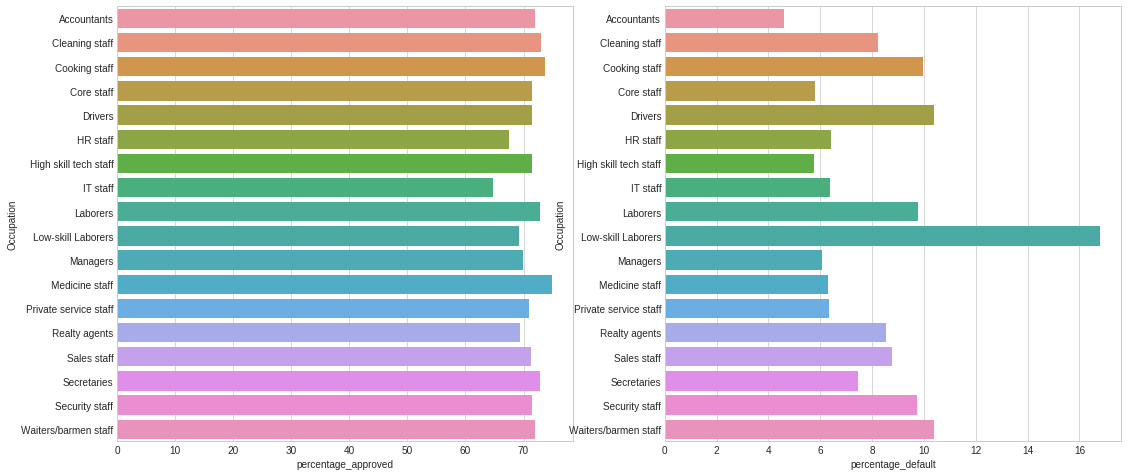

In [227]:
plt.figure(figsize=(18,8))
plt.subplot(121)
sns.barplot(x='percentage_approved', y='Occupation', data=occ_typ_lstat)

plt.subplot(122)
sns.barplot(x='percentage_default', y='Occupation', data=occ_typ_target)

Low-skill labourers although enjoying an approval rating of above 70% are the most likely to default on their loans, with the default rate being as high as 17%<br>
High-tech skill staff on the other hand has the second least rate of default. This just goes to show the impact of education on the financial health of the individual.<br>
The best category which offer the least amount of risk to the bank is 'Accountant' whose rate of default is below 5%.

#### Kind of Clients that default the most

In [228]:
clnt_dflt = applications['p_NAME_CLIENT_TYPE'].value_counts()
clnt_dflt = pd.DataFrame({'Client Type':clnt_dflt.index, 'Count_total':clnt_dflt.values})

clnt_dflt1 = applications['a_TARGET'].groupby(applications['p_NAME_CLIENT_TYPE']).sum()
clnt_dflt1 = pd.DataFrame({'Client Type':clnt_dflt1.index, 'Count_default':clnt_dflt1.values})

clnt_dflt = clnt_dflt.merge(clnt_dflt1, how='inner', on='Client Type')
clnt_dflt['percentage_default'] = round((clnt_dflt['Count_default']/clnt_dflt['Count_total'])*100, 2)
clnt_dflt = clnt_dflt.sort_values('Client Type', ascending = True)
clnt_dflt

,Client Type,Count_total,Count_default,percentage_default
1,New,156865,12558,8.01
2,Refreshed,32958,1963,5.96
0,Repeater,236731,16349,6.91
3,XNA,251,20,7.97


In [229]:
clnt_dflt_ls = applications['p_NAME_CLIENT_TYPE'].value_counts()
clnt_dflt_ls = pd.DataFrame({'Client Type':clnt_dflt_ls.index, 'Count_total':clnt_dflt_ls.values})

clnt_dflt_ls1 = applications['p_LOAN_STATUS'].groupby(applications['p_NAME_CLIENT_TYPE']).sum()
clnt_dflt_ls1 = pd.DataFrame({'Client Type':clnt_dflt_ls1.index, 'Count_approved':clnt_dflt_ls1.values})

clnt_dflt_ls = clnt_dflt_ls.merge(clnt_dflt_ls1, how='inner', on='Client Type')
clnt_dflt_ls['percentage_approved'] = round((clnt_dflt_ls['Count_approved']/clnt_dflt_ls['Count_total'])*100, 2)
clnt_dflt_ls = clnt_dflt_ls.sort_values('Client Type', ascending = True)
clnt_dflt_ls

,Client Type,Count_total,Count_approved,percentage_approved
1,New,156865,150104.0,95.69
2,Refreshed,32958,30415.0,92.28
0,Repeater,236731,194680.0,82.24
3,XNA,251,221.0,88.05


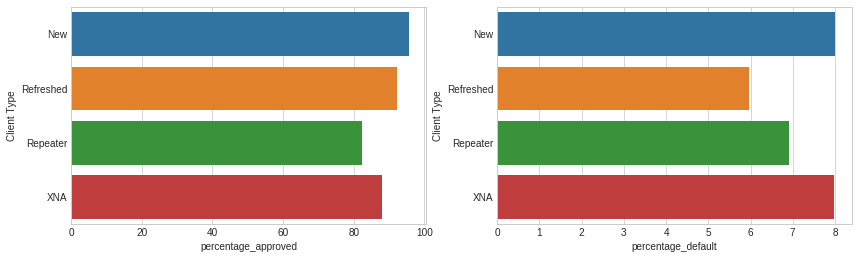

In [230]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.barplot(y='Client Type', x='percentage_approved', data=clnt_dflt_ls)

plt.subplot(122)
sns.barplot(y='Client Type', x='percentage_default', data=clnt_dflt)

WE can see that alothough new clients are preferred by the bank when approving the loans, it is those now clients which default 8% of the time.<br>
However, if we look at the 'Refreshed' category, these applicants are less likely to defaultwith their default rate being less than 6%. Hence 'Refreshed' clients must be given priority while approving the loans.<br>
Bank's decision turns out to be right in not approving loans of 'Repeater clients' since their default rate is 8%.

#### NAME_CASH_LOAN_PURPOSE

In [231]:
purpose_ls = applications['p_NAME_CASH_LOAN_PURPOSE'].value_counts()
purpose_ls = pd.DataFrame({'Purpose':purpose_ls.index, 'Count_total':purpose_ls.values})

purpose_ls1 = applications['p_LOAN_STATUS'].groupby(applications['p_NAME_CASH_LOAN_PURPOSE']).sum()
purpose_ls1 = pd.DataFrame({'Purpose':purpose_ls1.index, 'Count_approved':purpose_ls1.values})

purpose_ls = purpose_ls.merge(purpose_ls1, how='inner', on='Purpose')
purpose_ls['percentage_approved'] = round((purpose_ls['Count_approved']/purpose_ls['Count_total'])*100, 2)
purpose_ls = purpose_ls.sort_values('Purpose', ascending = True)
purpose_ls

,Purpose,Count_total,Count_approved,percentage_approved
10,Buying a new car,47,18.0,38.30
9,Buying a used car,219,89.0,40.64
5,Education,454,257.0,56.61
4,Everyday expenses,781,420.0,53.78
13,Hobby,2,0.0,0.00
8,Journey,227,124.0,54.63
6,Medicine,406,243.0,59.85
12,Money for a third person,6,2.0,33.33
2,Other,2152,1087.0,50.51
11,Payments on other loans,39,9.0,23.08


In [232]:
purpose_target = applications['p_NAME_CASH_LOAN_PURPOSE'].value_counts()
purpose_target = pd.DataFrame({'Purpose':purpose_target.index, 'Count_total':purpose_target.values})

purpose_target1 = applications['a_TARGET'].groupby(applications['p_NAME_CASH_LOAN_PURPOSE']).sum()
purpose_target1 = pd.DataFrame({'Purpose':purpose_target1.index, 'Count_default':purpose_target1.values})

purpose_target = purpose_target.merge(purpose_target1, how='inner', on='Purpose')
purpose_target['percentage_default'] = round((purpose_target['Count_default']/purpose_target['Count_total'])*100, 2)
purpose_target = purpose_target.sort_values('Purpose', ascending = True)
purpose_target

,Purpose,Count_total,Count_default,percentage_default
10,Buying a new car,47,4,8.51
9,Buying a used car,219,26,11.87
5,Education,454,36,7.93
4,Everyday expenses,781,41,5.25
13,Hobby,2,1,50.00
8,Journey,227,19,8.37
6,Medicine,406,20,4.93
12,Money for a third person,6,1,16.67
2,Other,2152,168,7.81
11,Payments on other loans,39,6,15.38


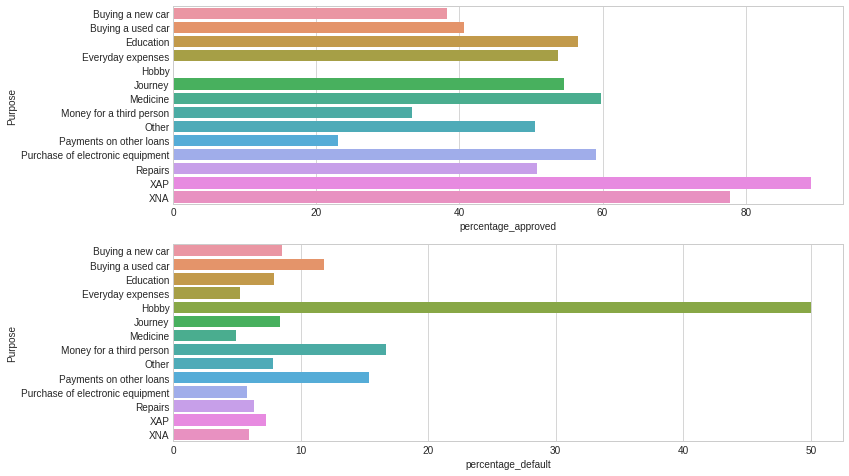

In [233]:
plt.figure(figsize = (12,8))
plt.subplot(211)
sns.barplot(y='Purpose', x='percentage_approved', data=purpose_ls)

plt.subplot(212)
sns.barplot(y='Purpose', x='percentage_default', data=purpose_target)

It can be seen that the highest defaults are found in the following categories:
1. Buying a used car (12%): The aprroval rating is arounf 40% which needs to be reduced further so as to avoid losses.<br>
2. Hobby(50%) : Since there are only 2 records pertaining to this category, it is rather difficult to arrive at any conclusion about it. However the approval rating is 0% for it.<br>
3. Money for a third person(17%) : The approval rating for it is 33% that means that the bank is rejecting two-thirds of the applicants which is a healthy number.<br>
4. Payments on other loans(15%) : The approval rating of it being 15% therefore the bank's money is right on the mark. Also it is rather ludicrous to get a new loan in order to pay off another.

#### NAME_PRODUCT_TYPE:

In [234]:
nm_prod_ls = applications['p_NAME_PRODUCT_TYPE'].value_counts()
nm_prod_ls = pd.DataFrame({'Product Type':nm_prod_ls.index, 'Count_total':nm_prod_ls.values})

nm_prod_ls1 = applications['p_LOAN_STATUS'].groupby(applications['p_NAME_PRODUCT_TYPE']).sum()
nm_prod_ls1 = pd.DataFrame({'Product Type':nm_prod_ls1.index, 'Count_approved':nm_prod_ls1.values})

nm_prod_ls = nm_prod_ls.merge(nm_prod_ls1, how='inner', on='Product Type')
nm_prod_ls['percentage_approved'] = round((nm_prod_ls['Count_approved']/nm_prod_ls['Count_total'])*100, 2)
nm_prod_ls = nm_prod_ls.sort_values('Product Type', ascending = True)
nm_prod_ls

,Product Type,Count_total,Count_approved,percentage_approved
0,XNA,398393,354923.0,89.09
2,walk-in,10026,5662.0,56.47
1,x-sell,18386,14835.0,80.69


In [235]:
nm_prod_target = applications['p_NAME_PRODUCT_TYPE'].value_counts()
nm_prod_target = pd.DataFrame({'Product Type':nm_prod_target.index, 'Count_total':nm_prod_target.values})

nm_prod_target1 = applications['a_TARGET'].groupby(applications['p_NAME_PRODUCT_TYPE']).sum()
nm_prod_target1 = pd.DataFrame({'Product Type':nm_prod_target1.index, 'Count_default':nm_prod_target1.values})

nm_prod_target = nm_prod_target.merge(nm_prod_target1, how='inner', on='Product Type')
nm_prod_target['percentage_default'] = round((nm_prod_target['Count_default']/nm_prod_target['Count_total'])*100, 2)
nm_prod_target = nm_prod_target.sort_values('Product Type', ascending = True)
nm_prod_target

,Product Type,Count_total,Count_default,percentage_default
0,XNA,398393,29132,7.31
2,walk-in,10026,714,7.12
1,x-sell,18386,1044,5.68


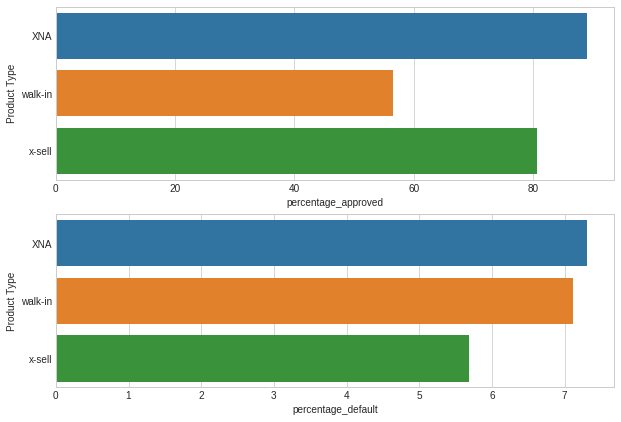

In [236]:
plt.figure(figsize = (10,7))
plt.subplot(211)
sns.barplot(y='Product Type', x='percentage_approved', data=nm_prod_ls)

plt.subplot(212)
sns.barplot(y='Product Type', x='percentage_default', data=nm_prod_target)

The applicants whose loans are categorized as 'walk-in' products are more likely to default with their default rating being 7%. The approval rating for the same ratings is around 56% which needs to be lowered further.<br>
On the other hand, applicants opting for 'X-sell' kind of loans have much less likelihood of defaulting (5.5%) and their approval rating is also above 80%. One reason for this might be that 'X-sell' product is only preferred by thr literate section of applicants since it is an online product and therefore they are less likely to default.

#### CHANNEL_TYPE

In [237]:
chnl_typ_ls = applications['p_CHANNEL_TYPE'].value_counts()
chnl_typ_ls = pd.DataFrame({'Channel Type':chnl_typ_ls.index, 'Count_total':chnl_typ_ls.values})

chnl_typ_ls1 = applications['p_LOAN_STATUS'].groupby(applications['p_CHANNEL_TYPE']).sum()
chnl_typ_ls1 = pd.DataFrame({'Channel Type':chnl_typ_ls1.index, 'Count_approved':chnl_typ_ls1.values})

chnl_typ_ls = chnl_typ_ls.merge(chnl_typ_ls1, how='inner', on='Channel Type')
chnl_typ_ls['percentage_approved'] = round((chnl_typ_ls['Count_approved']/chnl_typ_ls['Count_total'])*100, 2)
chnl_typ_ls = chnl_typ_ls.sort_values('Channel Type', ascending = True)
chnl_typ_ls

,Channel Type,Count_total,Count_approved,percentage_approved
5,AP+ (Cash loan),11,11.0,100.00
4,Contact center,22,20.0,90.91
0,Country-wide,218138,192297.0,88.15
3,Credit and cash offices,27978,20142.0,71.99
2,Regional / Local,61034,55395.0,90.76
1,Stone,119622,107555.0,89.91


In [238]:
chnl_typ_target = applications['p_CHANNEL_TYPE'].value_counts()
chnl_typ_target = pd.DataFrame({'Channel Type':chnl_typ_target.index, 'Count_total':chnl_typ_target.values})

chnl_typ_target1 = applications['a_TARGET'].groupby(applications['p_CHANNEL_TYPE']).sum()
chnl_typ_target1 = pd.DataFrame({'Channel Type':chnl_typ_target1.index, 'Count_default':chnl_typ_target1.values})

chnl_typ_target = chnl_typ_target.merge(chnl_typ_target1, how='inner', on='Channel Type')
chnl_typ_target['percentage_default'] = round((chnl_typ_target['Count_default']/chnl_typ_target['Count_total'])*100, 2)
chnl_typ_target = chnl_typ_target.sort_values('Channel Type', ascending = True)
chnl_typ_target

,Channel Type,Count_total,Count_default,percentage_default
5,AP+ (Cash loan),11,4,36.36
4,Contact center,22,1,4.55
0,Country-wide,218138,16215,7.43
3,Credit and cash offices,27978,1716,6.13
2,Regional / Local,61034,4469,7.32
1,Stone,119622,8485,7.09


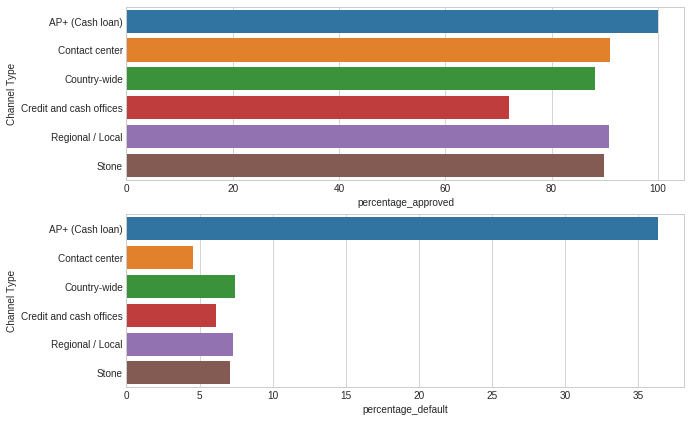

In [239]:
plt.figure(figsize = (10,7))
plt.subplot(211)
sns.barplot(y='Channel Type', x='percentage_approved', data=chnl_typ_ls)

plt.subplot(212)
sns.barplot(y='Channel Type', x='percentage_default', data=chnl_typ_target)

At the first glance it may seem that the bank is losing a great deal of money on 'AP+ (Cash loan)', but on closer inspection we can see that there are only 11 applicants who opted for it. Out of a total of 4 lakh+ applicants, this number is not enought to make any observations about this category.<br>
The same goes for 'Contact center' as well.<br>
<br>
The channel 'Country-wide' has been performing well, sincet the default rating is 4.5% therefore an approval rating of about 91% is justified.<br> <br>
For the channel 'Credit and cash offices', the apprival rating is only 72%. However it can be seen that the possibility of client defaulting is only 6%. Therefore, the bank can increase the approvals for these channels which in turn will increase the bank's revenue.

#### NAME_YIELD_GROUP

In [240]:
int_ls = applications['p_NAME_YIELD_GROUP'].value_counts()
int_ls = pd.DataFrame({'Interest Type':int_ls.index, 'Count_total':int_ls.values})

int_ls1 = applications['p_LOAN_STATUS'].groupby(applications['p_NAME_YIELD_GROUP']).sum()
int_ls1 = pd.DataFrame({'Interest Type':int_ls1.index, 'Count_approved':int_ls1.values})

int_ls = int_ls.merge(int_ls1, how='inner', on='Interest Type')
int_ls['percentage_approved'] = round((int_ls['Count_approved']/int_ls['Count_total'])*100, 2)
int_ls = int_ls.sort_values('Interest Type', ascending = True)
int_ls

,Interest Type,Count_total,Count_approved,percentage_approved
4,XNA,5182,7.0,0.14
0,high,156235,137681.0,88.12
3,low_action,42125,37183.0,88.27
2,low_normal,103020,92239.0,89.54
1,middle,120243,108310.0,90.08


In [241]:
int_target = applications['p_NAME_YIELD_GROUP'].value_counts()
int_target = pd.DataFrame({'Interest Type':int_target.index, 'Count_total':int_target.values})

int_target1 = applications['a_TARGET'].groupby(applications['p_NAME_YIELD_GROUP']).sum()
int_target1 = pd.DataFrame({'Interest Type':int_target1.index, 'Count_default':int_target1.values})

int_target = int_target.merge(int_target1, how='inner', on='Interest Type')
int_target['percentage_default'] = round((int_target['Count_default']/int_target['Count_total'])*100, 2)
int_target = int_target.sort_values('Interest Type', ascending = True)
int_target

,Interest Type,Count_total,Count_default,percentage_default
4,XNA,5182,402,7.76
0,high,156235,12379,7.92
3,low_action,42125,2698,6.40
2,low_normal,103020,6784,6.59
1,middle,120243,8627,7.17


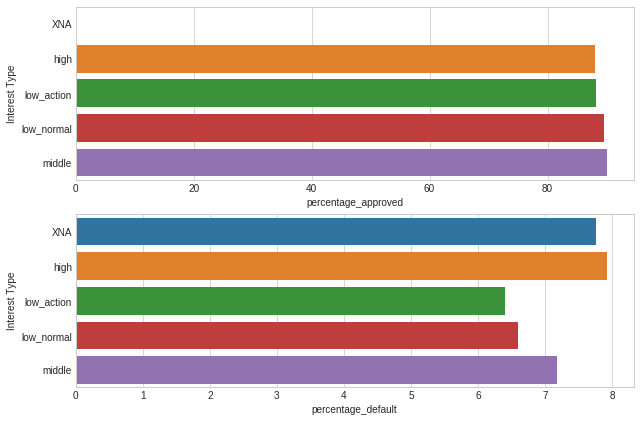

In [242]:
plt.figure(figsize = (10,7))
plt.subplot(211)
sns.barplot(y='Interest Type', x='percentage_approved', data=int_ls)

plt.subplot(212)
sns.barplot(y='Interest Type', x='percentage_default', data=int_target)

The interest group 'XNA' can be ignored here since it is not possible to state the interest rate of an application for which data is not available.<br>
It can be seen that the defult rate decreases from 'high' interest rates to 'low' interest rates whereas the approval rating increases slightly for the same.<br><br>
To be noted that the bank risks losing money on loans with high interest as the default rate is almost 8% and the approval rating is close to 90%.<br>
The same goes for loans with 'middle' interest rates since the approval rating is the highest at 90% and the rate of default is above 7%<br> <br>
The bank's strategy on loans with 'low' interest is on the right track since the default ratings are lower and the approval ratings are high.

#### AMT_DOWN_PAYMENT:

In [243]:
applications['p_AMT_DOWN_PAYMENT'].describe()

count    4.268050e+05
mean     7.044853e+03
std      1.630790e+04
min      0.000000e+00
25%      0.000000e+00
50%      2.385000e+03
75%      8.995500e+03
max      3.060045e+06
Name: p_AMT_DOWN_PAYMENT, dtype: float64

In [244]:
dwn_pymt = applications[['a_TARGET', 'p_AMT_DOWN_PAYMENT']]

# Removing the null values:
dwn_pymt = dwn_pymt[~dwn_pymt['p_AMT_DOWN_PAYMENT'].isnull()]

In [245]:
# changing the datatype to int:
dwn_pymt['p_AMT_DOWN_PAYMENT'] = round(dwn_pymt['p_AMT_DOWN_PAYMENT'], 0)
dwn_pymt['p_AMT_DOWN_PAYMENT'] = dwn_pymt['p_AMT_DOWN_PAYMENT'].astype(int)
dwn_pymt.head()

,a_TARGET,p_AMT_DOWN_PAYMENT
1,0,0
2,0,6885
3,0,4860
4,0,66987
5,0,3676


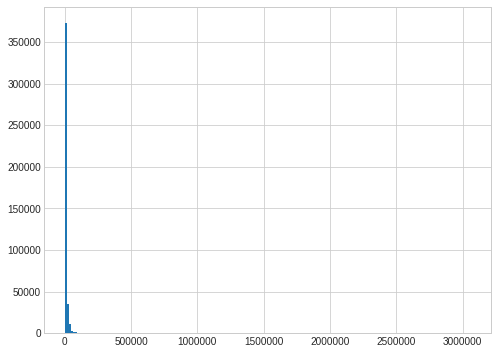

In [246]:
# TAking a look at the distribution:
plt.figure(figsize=(8,6))
plt.hist(dwn_pymt['p_AMT_DOWN_PAYMENT'], bins=200)
plt.show()

Since the plot is heavily skewed to the left, let us zoom in to see what the distribution looks like

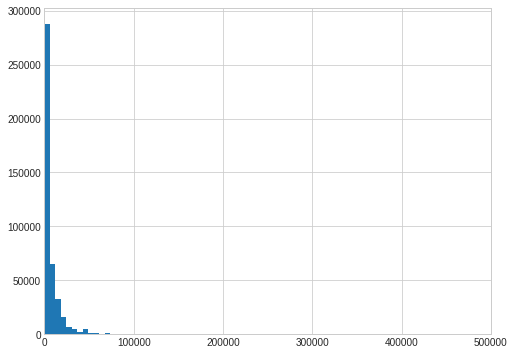

In [247]:
plt.figure(figsize=(8,6))
plt.hist(dwn_pymt['p_AMT_DOWN_PAYMENT'], bins=500)
plt.xlim(0,500000)
plt.show()

We can see that the majority of the downpayments are on the lower side of 1 lakh rupees, hence zooming in further. 

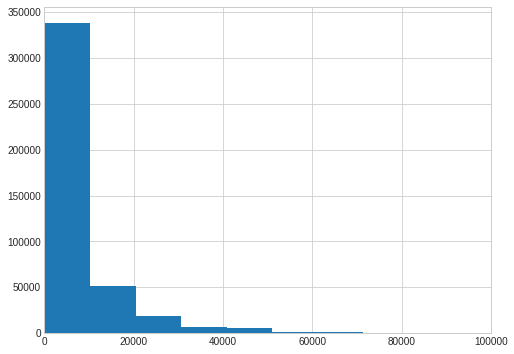

In [248]:
plt.figure(figsize=(8,6))
plt.hist(dwn_pymt['p_AMT_DOWN_PAYMENT'], bins=300)
plt.xlim(0, 100000)
plt.show()

From the above plot, we can now create a new variable called dwn_paymet_group which categorises the down payments done into buckets which can then be easily analyzed.<br>
Let us keep the bucket size as 10k rupees.

In [249]:
dwn_pymt_list = []

for i in dwn_pymt['p_AMT_DOWN_PAYMENT']:
    if i>=0 and i<10000:
        dwn_pymt_list.append('0-10k')
    elif i>=10000 and i<20000:
        dwn_pymt_list.append('10-20k')
    elif i>=20000 and i<30000:
        dwn_pymt_list.append('20-30k')
    elif i>=30000 and i<40000:
        dwn_pymt_list.append('30-40k')
    elif i>=40000 and i<50000:
        dwn_pymt_list.append('40-50k')
    else:
        dwn_pymt_list.append('50k+')
        
dwn_pymt['Amount Range'] = dwn_pymt_list
dwn_pymt['Amount Range'].value_counts()

0-10k     336924
10-20k     51872
20-30k     19069
50k+        6616
30-40k      6296
40-50k      6028
Name: Amount Range, dtype: int64

In [250]:
# Total applicants:
dwn_pymt_tot = dwn_pymt['Amount Range'].value_counts()
dwn_pymt_tot = pd.DataFrame({'Amount Range':dwn_pymt_tot.index, 'Count_total':dwn_pymt_tot.values})

# Defaulters:
dwn_pymt_dflt = dwn_pymt['a_TARGET'].groupby(dwn_pymt['Amount Range']).sum()
dwn_pymt_dflt = pd.DataFrame({'Amount Range':dwn_pymt_dflt.index, 'Count_default':dwn_pymt_dflt.values})

# Merging:
dwn_pymt_tot = dwn_pymt_tot.merge(dwn_pymt_dflt, how='inner', on='Amount Range')
# Percentage:
dwn_pymt_tot['percentage'] = round((dwn_pymt_tot['Count_default']/dwn_pymt_tot['Count_total'])*100, 2)
dwn_pymt_tot

,Amount Range,Count_total,Count_default,percentage
0,0-10k,336924,25674,7.62
1,10-20k,51872,3168,6.11
2,20-30k,19069,1060,5.56
3,50k+,6616,348,5.26
4,30-40k,6296,326,5.18
5,40-50k,6028,314,5.21


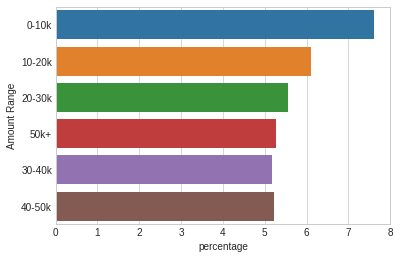

In [251]:
# Plotting:
plt.figure(figsize=(6,4))
sns.barplot(x='percentage', y='Amount Range', data=dwn_pymt_tot)

As we can see from the above plot, people with lesser down payments tend to default more with the default rate nearing 7.5%.<br>
As the down payment goes up the default rate comes down significantly to around 5%